# 1. Data Preparation

## Install and Import Libraries

In [41]:
!pip install pandas matplotlib seaborn scikit-learn

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA

## Load Datasets

In [43]:
gsc_data = pd.read_csv('gsc_data.csv')
traffic_data = pd.read_csv('traffic_data.csv')
url_data = pd.read_csv('url_data.csv')


## GSC Data

# 1. Data Preparation

In [44]:
# Display basic information
gsc_data.info()

# Display summary statistics
gsc_data.describe(include='all')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84265 entries, 0 to 84264
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         84265 non-null  int64  
 1   month        84265 non-null  int64  
 2   page         84265 non-null  object 
 3   clicks       84265 non-null  int64  
 4   impressions  84265 non-null  int64  
 5   position     84265 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 3.9+ MB


,year,month,page,clicks,impressions,position
count,84265.000000,84265.000000,84265,84265.000000,8.426500e+04,84265.000000
unique,NaN,NaN,7085,NaN,NaN,NaN
top,NaN,NaN,/canal-de-suez/,NaN,NaN,NaN
freq,NaN,NaN,16,NaN,NaN,NaN
mean,2023.278823,5.469531,NaN,3624.520548,1.174136e+05,6.173169
std,0.448423,3.521576,NaN,8095.408430,1.951487e+05,2.527610
min,2023.000000,1.000000,NaN,0.000000,1.000000e+00,1.000000
25%,2023.000000,2.000000,NaN,365.000000,1.867100e+04,4.730836
50%,2023.000000,4.000000,NaN,1354.000000,6.085200e+04,5.793681
75%,2024.000000,8.000000,NaN,3928.000000,1.461080e+05,7.112449


In [45]:
# Display basic information
gsc_data.head()

,year,month,page,clicks,impressions,position
0,2023,1,/canal-de-suez/,86,9709,7.280043
1,2023,1,/gimnospermas/,261,20091,7.174036
2,2023,1,/grande-sertao-veredas-de-guimaraes-rosa/,250,25378,7.731593
3,2023,1,/monarquia-constitucional/,349,19990,8.239103
4,2023,1,/substantivo-sobrecomum/,287,6718,5.684849


When 50% of the clicks in a dataset is lower than the mean number of clicks, it often indicates that the data is right-skewed. In a right-skewed distribution, the mean is greater than the median due to a long tail on the right side.

## Check missing values and zero values

In [46]:
# Check for missing values in GSC data
print("Missing values in GSC data:")
print(gsc_data.isnull().sum())


Missing values in GSC data:
year           0
month          0
page           0
clicks         0
impressions    0
position       0
dtype: int64


In [47]:
# Check for zero values in GSC data
print("\nZero values in GSC data:")
print((gsc_data == 0).sum())



Zero values in GSC data:
year           0
month          0
page           0
clicks         9
impressions    0
position       0
dtype: int64


In [48]:
# Check for duplicates
print("\nDuplicates in GSC data:")
print(gsc_data.duplicated().sum())


Duplicates in GSC data:
0


# 2. Data Analysis

In [49]:
# Identify rows with zero values in the 'clicks' column
zero_clicks_rows = gsc_data[gsc_data['clicks'] == 0]

# Display the rows with zero values in the 'clicks' column
print("Rows with zero values in the 'clicks' column:")
print(zero_clicks_rows)

Rows with zero values in the 'clicks' column:
       year  month                                        page  clicks  \
15526  2023     12    /tipos-de-arte/#anchor-4-arte--escultura       0   
22591  2023     12       /lingua-portuguesa/morfologia/page/3/       0   
24357  2023     12  /tipos-de-clima/#anchor-clima-mediterraneo       0   
27786  2023     12               /matematica/geometria/page/3/       0   
33138  2023     12   /tipos-de-arte/#anchor-8-arte--fotografia       0   
56048  2023     12              /globalizacao/#anchor-cultural       0   
57758  2023     12   /tipos-de-clima/#anchor-clima-subtropical       0   
63020  2023     12     /tipos-de-clima/#anchor-clima-desertico       0   
70135  2023     12      /tipos-de-clima/#anchor-clima-tropical       0   

       impressions  position  
15526          579  5.307954  
22591         1120  4.997123  
24357          301  4.388704  
27786          503  4.238157  
33138         1942  4.700106  
56048          225  6.00000

In [50]:
# Remove rows with zero values in the 'clicks' column
filtered_gsc_data = gsc_data[gsc_data['clicks'] != 0]

# Display the new dataset without zero clicks
print("Dataset without zero clicks:")
print(filtered_gsc_data)

Dataset without zero clicks:
       year  month                                       page  clicks  \
0      2023      1                            /canal-de-suez/      86   
1      2023      1                             /gimnospermas/     261   
2      2023      1  /grande-sertao-veredas-de-guimaraes-rosa/     250   
3      2023      1                 /monarquia-constitucional/     349   
4      2023      1                   /substantivo-sobrecomum/     287   
...     ...    ...                                        ...     ...   
84260  2023      4                     /numeros-romanos/1994/       3   
84261  2024      4                      /numeros-romanos/605/      12   
84262  2023      3                        /autor/laura-aidar/      27   
84263  2024      4                      /numeros-romanos/555/       4   
84264  2024      1                 /numeros-romanos/dclxxiii/       6   

       impressions  position  
0             9709  7.280043  
1            20091  7.174036  
2

In [51]:
filtered_gsc_data = gsc_data

### Pages that have highest amount of clicks for 2023 and 2024

In [52]:
# Filter data for the years 2023 and 2024
data_2023 = gsc_data[gsc_data['year'] == 2023]
data_2024 = gsc_data[gsc_data['year'] == 2024]

# Group the data by 'page' and sum the 'clicks' for each page for 2023
page_clicks_2023 = data_2023.groupby('page')['clicks'].sum().reset_index()

# Sort the pages by the number of clicks in descending order for 2023
top_pages_2023 = page_clicks_2023.sort_values(by='clicks', ascending=False).head(10)  # Top 10 pages with highest clicks for 2023

In [53]:
# Verify the top pages after grouping and summing
print("Top pages after grouping and summing (2023):")
print(page_clicks_2023.sort_values(by='clicks', ascending=False).head(10))


Top pages after grouping and summing (2023):
                                                 page   clicks
93                                        /adivinhas/  2967517
5923                               /tabela-periodica/  1766352
4970  /perguntas-e-respostas-de-conhecimentos-gerais/  1470631
92                               /adivinhas-infantis/  1143487
6161                                  /trava-linguas/  1129759
1052                                     /conectivos/  1073503
0                                                   /   930880
2169                           /figuras-de-linguagem/   748885
5781                                 /simple-present/   651005
1867                      /exercicios-de-porcentagem/   624844


In [54]:
# Verify the sorted top pages for plotting
print("Sorted top pages (2023):")
print(top_pages_2023)

Sorted top pages (2023):
                                                 page   clicks
93                                        /adivinhas/  2967517
5923                               /tabela-periodica/  1766352
4970  /perguntas-e-respostas-de-conhecimentos-gerais/  1470631
92                               /adivinhas-infantis/  1143487
6161                                  /trava-linguas/  1129759
1052                                     /conectivos/  1073503
0                                                   /   930880
2169                           /figuras-de-linguagem/   748885
5781                                 /simple-present/   651005
1867                      /exercicios-de-porcentagem/   624844


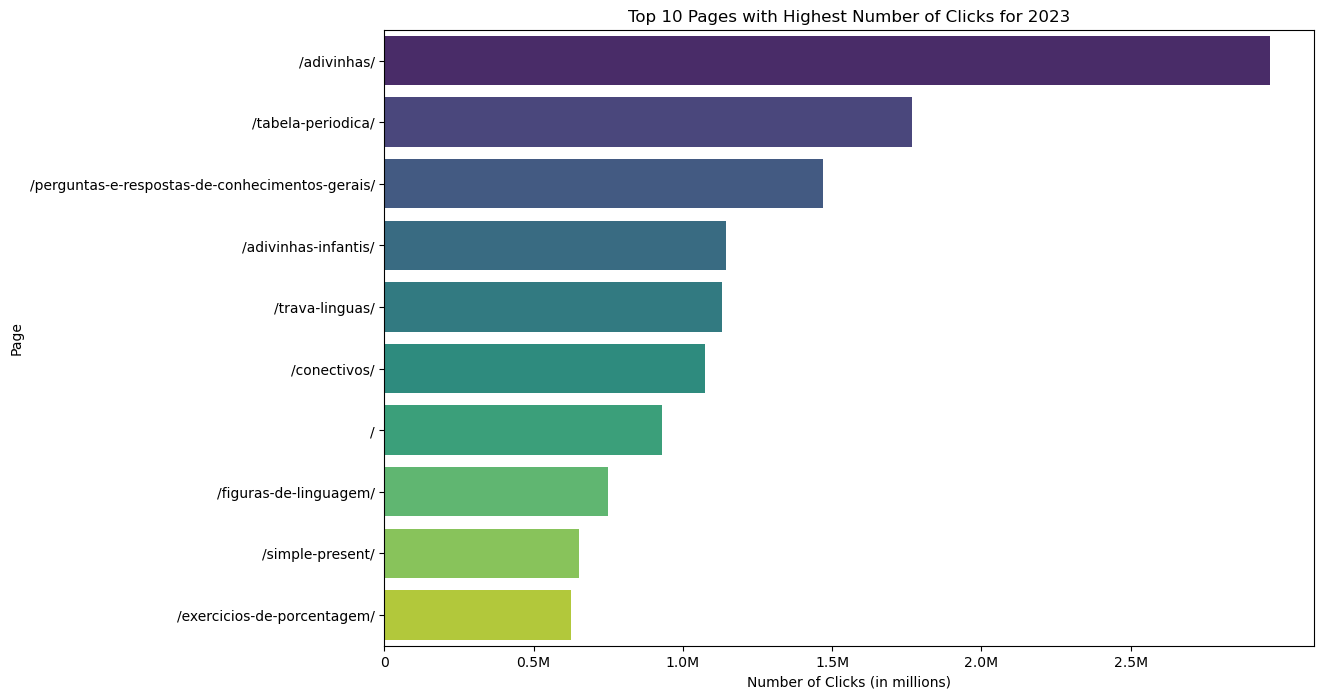

In [55]:
# Plot the top pages with highest clicks for 2023
plt.figure(figsize=(12, 8))
sns.barplot(data=top_pages_2023, x='clicks', y='page', palette='viridis')
plt.title('Top 10 Pages with Highest Number of Clicks for 2023')
plt.xlabel('Number of Clicks (in millions)')
plt.ylabel('Page')
plt.xticks(ticks=[0, 0.5e6, 1.0e6, 1.5e6, 2.0e6, 2.5e6], labels=['0', '0.5M', '1.0M', '1.5M', '2.0M', '2.5M'])
plt.show()

In [56]:
# Filter rows where the page column has the value '/' 
# This is not a good page
page_slash_data = gsc_data[gsc_data['page'] == '/']

# Display the filtered data
print("Rows with page value '/':")
print(page_slash_data)

Rows with page value '/':
       year  month page  clicks  impressions   position
3700   2024      4    /  142837       352309   7.160540
4571   2024      3    /  131300       334188   7.665762
5845   2024      1    /   32503       228969  11.637515
9580   2023      2    /   43803       280117  10.318748
12143  2023      1    /   23329       211855  15.386436
13556  2023      4    /   72909       254106   9.193940
20099  2024      2    /   72036       347642   9.134319
26199  2023      7    /   46377       185719  11.166150
29814  2023      9    /  107069       330872   8.644553
36325  2023      3    /   90534       307440   8.142049
51202  2023     12    /   45940       188563  13.765973
58940  2023     10    /  105617       324454   9.318847
66218  2023      8    /  110126       312568   7.247282
68968  2023      5    /   95404       308516   8.217924
77887  2023      6    /   77484       255374   8.563682
79295  2023     11    /  112288       347068   9.732155


Top pages after grouping and summing (2024):
                                                 page  clicks
98                                        /adivinhas/  879907
6181                               /tabela-periodica/  584716
5223  /perguntas-e-respostas-de-conhecimentos-gerais/  477963
0                                                   /  378676
1423            /dinamicas-para-primeiro-dia-de-aula/  376793
6419                                  /trava-linguas/  328565
1073                                     /conectivos/  303587
1904                      /exercicios-de-potenciacao/  247912
97                               /adivinhas-infantis/  239230
2217                           /figuras-de-linguagem/  231447
Sorted top pages (2024):
                                                 page  clicks
98                                        /adivinhas/  879907
6181                               /tabela-periodica/  584716
5223  /perguntas-e-respostas-de-conhecimentos-gerais/  477963


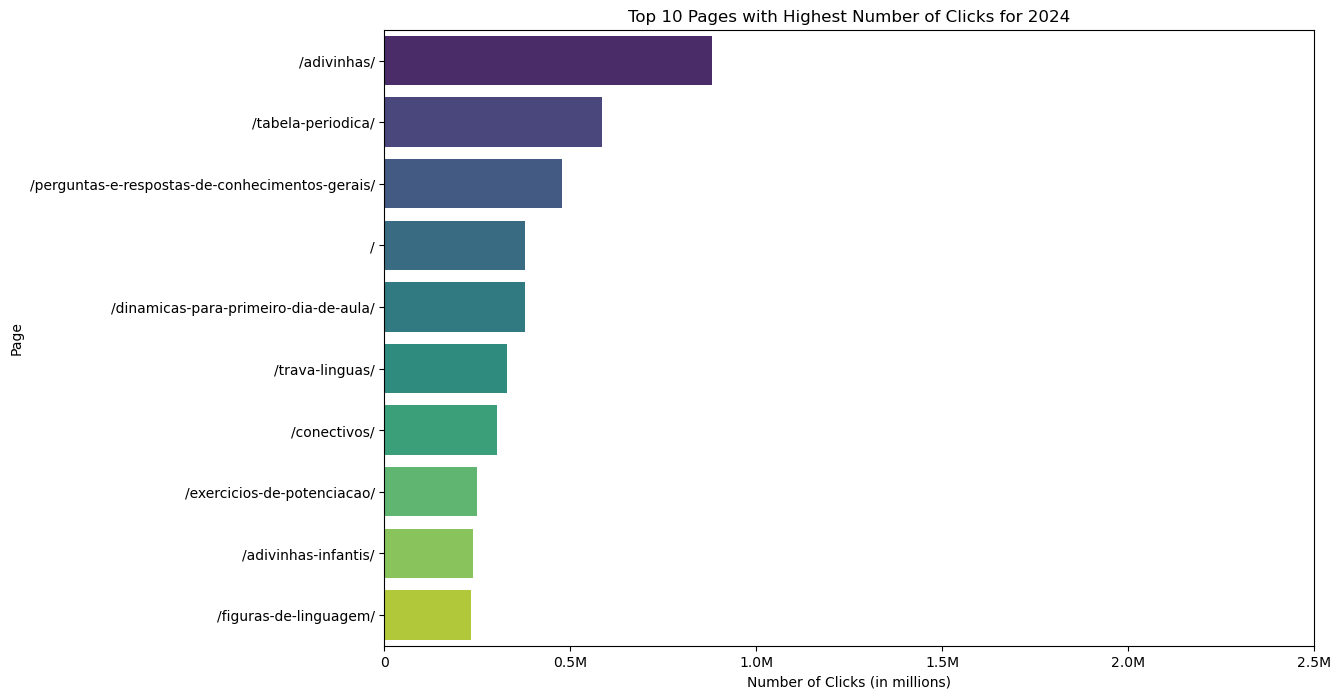

In [57]:
# Repeat the same steps for 2024
page_clicks_2024 = data_2024.groupby('page')['clicks'].sum().reset_index()
top_pages_2024 = page_clicks_2024.sort_values(by='clicks', ascending=False).head(10)

print("Top pages after grouping and summing (2024):")
print(page_clicks_2024.sort_values(by='clicks', ascending=False).head(10))

print("Sorted top pages (2024):")
print(top_pages_2024)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_pages_2024, x='clicks', y='page', palette='viridis')
plt.title('Top 10 Pages with Highest Number of Clicks for 2024')
plt.xlabel('Number of Clicks (in millions)')
plt.ylabel('Page')
plt.xticks(ticks=[0, 0.5e6, 1.0e6, 1.5e6, 2.0e6, 2.5e6], labels=['0', '0.5M', '1.0M', '1.5M', '2.0M', '2.5M'])
plt.show()

In [58]:
# Group the data by 'page' and sum the 'clicks' for each page for 2023 and 2024
page_clicks_2023 = data_2023.groupby('page')['clicks'].sum().reset_index()
page_clicks_2024 = data_2024.groupby('page')['clicks'].sum().reset_index()

# Rename the columns to reflect the years
page_clicks_2023.columns = ['page', 'clicks_2023']
page_clicks_2024.columns = ['page', 'clicks_2024']

# Merge the data for 2023 and 2024
merged_data = pd.merge(page_clicks_2023, page_clicks_2024, on='page', how='outer').fillna(0)

# Calculate the difference and percentage change in clicks
merged_data['click_difference'] = merged_data['clicks_2024'] - merged_data['clicks_2023']
merged_data['percent_change'] = (merged_data['click_difference'] / merged_data['clicks_2023']) * 100

# Display the merged data to understand trends
print("Merged data showing trends between 2023 and 2024:")
print(merged_data.sort_values(by='clicks_2023', ascending=False).head(20))

Merged data showing trends between 2023 and 2024:
                                                   page  clicks_2023  \
93                                          /adivinhas/    2967517.0   
5923                                 /tabela-periodica/    1766352.0   
4970    /perguntas-e-respostas-de-conhecimentos-gerais/    1470631.0   
92                                 /adivinhas-infantis/    1143487.0   
6161                                    /trava-linguas/    1129759.0   
1052                                       /conectivos/    1073503.0   
0                                                     /     930880.0   
2169                             /figuras-de-linguagem/     748885.0   
5781                                   /simple-present/     651005.0   
1867                        /exercicios-de-porcentagem/     624844.0   
4975  /perguntas-respostas-conhecimentos-gerais-nive...     616647.0   
846                                 /charadas-dificeis/     612840.0   
6340          

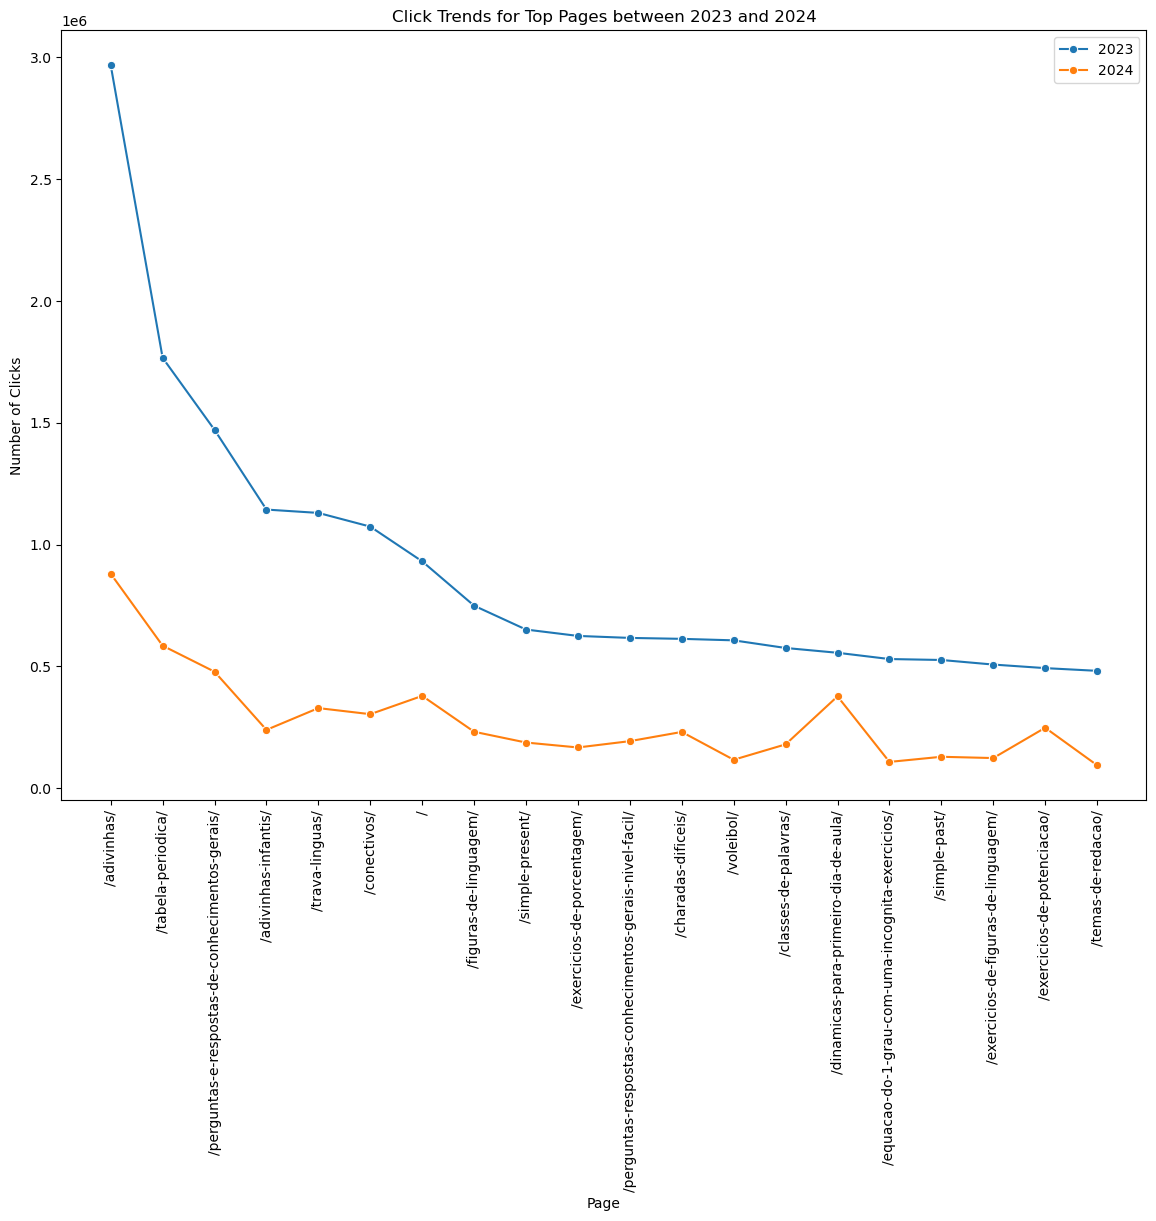

In [59]:
# Plotting the trends
plt.figure(figsize=(14, 10))
sns.lineplot(data=merged_data.sort_values(by='clicks_2023', ascending=False).head(20), x='page', y='clicks_2023', marker='o', label='2023')
sns.lineplot(data=merged_data.sort_values(by='clicks_2023', ascending=False).head(20), x='page', y='clicks_2024', marker='o', label='2024')
plt.title('Click Trends for Top Pages between 2023 and 2024')
plt.xlabel('Page')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [60]:
# Filter data for the years 2023 and 2024
data_2023 = gsc_data[gsc_data['year'] == 2023]
data_2024 = gsc_data[gsc_data['year'] == 2024]

# Group the data by 'page' and 'month' and sum the 'clicks' for each page for 2023 and 2024
page_month_clicks_2023 = data_2023.groupby(['page', 'month'])['clicks'].sum().reset_index()
page_month_clicks_2024 = data_2024.groupby(['page', 'month'])['clicks'].sum().reset_index()

# Rename the columns to reflect the years
page_month_clicks_2023.columns = ['page', 'month', 'clicks_2023']
page_month_clicks_2024.columns = ['page', 'month', 'clicks_2024']

# Merge the data for 2023 and 2024 on 'page' and 'month'
merged_page_month_clicks = pd.merge(page_month_clicks_2023, page_month_clicks_2024, on=['page', 'month'], how='outer').fillna(0)

# Summarize total clicks for each page across both years
total_clicks_per_page = merged_page_month_clicks.groupby('page')[['clicks_2023', 'clicks_2024']].sum().reset_index()

# Sort by total clicks in descending order and select the top 10 pages
top_pages = total_clicks_per_page.assign(total_clicks=total_clicks_per_page['clicks_2023'] + total_clicks_per_page['clicks_2024']) \
                                  .sort_values(by='total_clicks', ascending=False).head(10)['page']


In [61]:
# Filter the merged data to include only the top pages
filtered_data = merged_page_month_clicks[merged_page_month_clicks['page'].isin(top_pages)]

# Melt the data for easier plotting
melted_data = pd.melt(filtered_data, id_vars=['page', 'month'], value_vars=['clicks_2023', 'clicks_2024'], var_name='year', value_name='clicks')
melted_data['year'] = melted_data['year'].apply(lambda x: x.split('_')[1])  # Extract the year from the column name

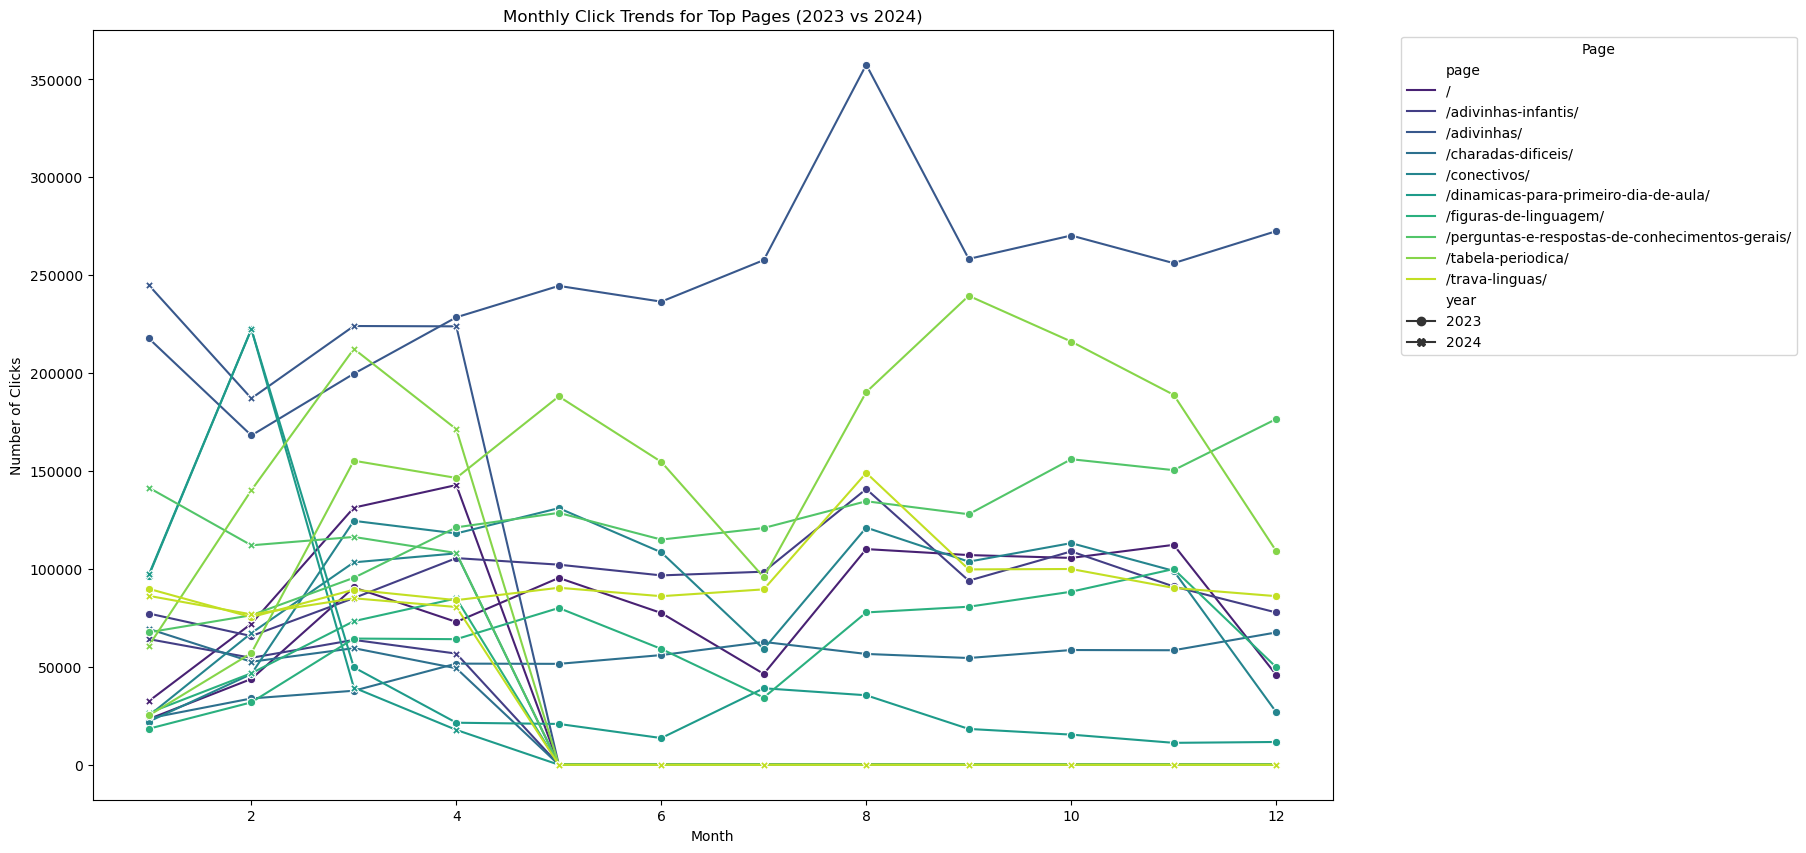

In [62]:
# Plotting the monthly click trends for the top pages
plt.figure(figsize=(16, 10))
sns.lineplot(data=melted_data, x='month', y='clicks', hue='page', style='year', markers=True, dashes=False, palette='viridis')
plt.title('Monthly Click Trends for Top Pages (2023 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Number of Clicks')
plt.legend(title='Page', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

High Click Pages:

The page with the / URL shows the highest number of clicks in both 2023 and 2024. This page has a noticeable spike in clicks around the middle of the year in 2024.
Other high-click pages include /adivinhas-infantis/, /adivinhas/, and /tabela-periodica/.
Year-over-Year Changes:

The clicks for most pages show different patterns in 2023 compared to 2024.
For example, /adivinhas-infantis/ had higher clicks in the first half of 2023 compared to 2024, but it saw a significant spike around May in 2024.
The / page saw a peak in clicks around May 2024, which was not present in 2023.
Seasonal Patterns:

Several pages display what appears to be seasonal trends, with peaks in specific months. For instance, the /tabela-periodica/ page shows increased clicks in the middle months of the year.
Pages like /perguntas-e-respostas-de-conhecimentos-gerais/ have consistent traffic throughout the year but with noticeable peaks and troughs.
Comparison of Peaks and Troughs:

Comparing the peaks and troughs for each page across the two years can help identify which months drive the most traffic for specific content.
For example, the /adivinhas/ page has more stable clicks across the months in both years but with a slight increase in certain months in 2024.

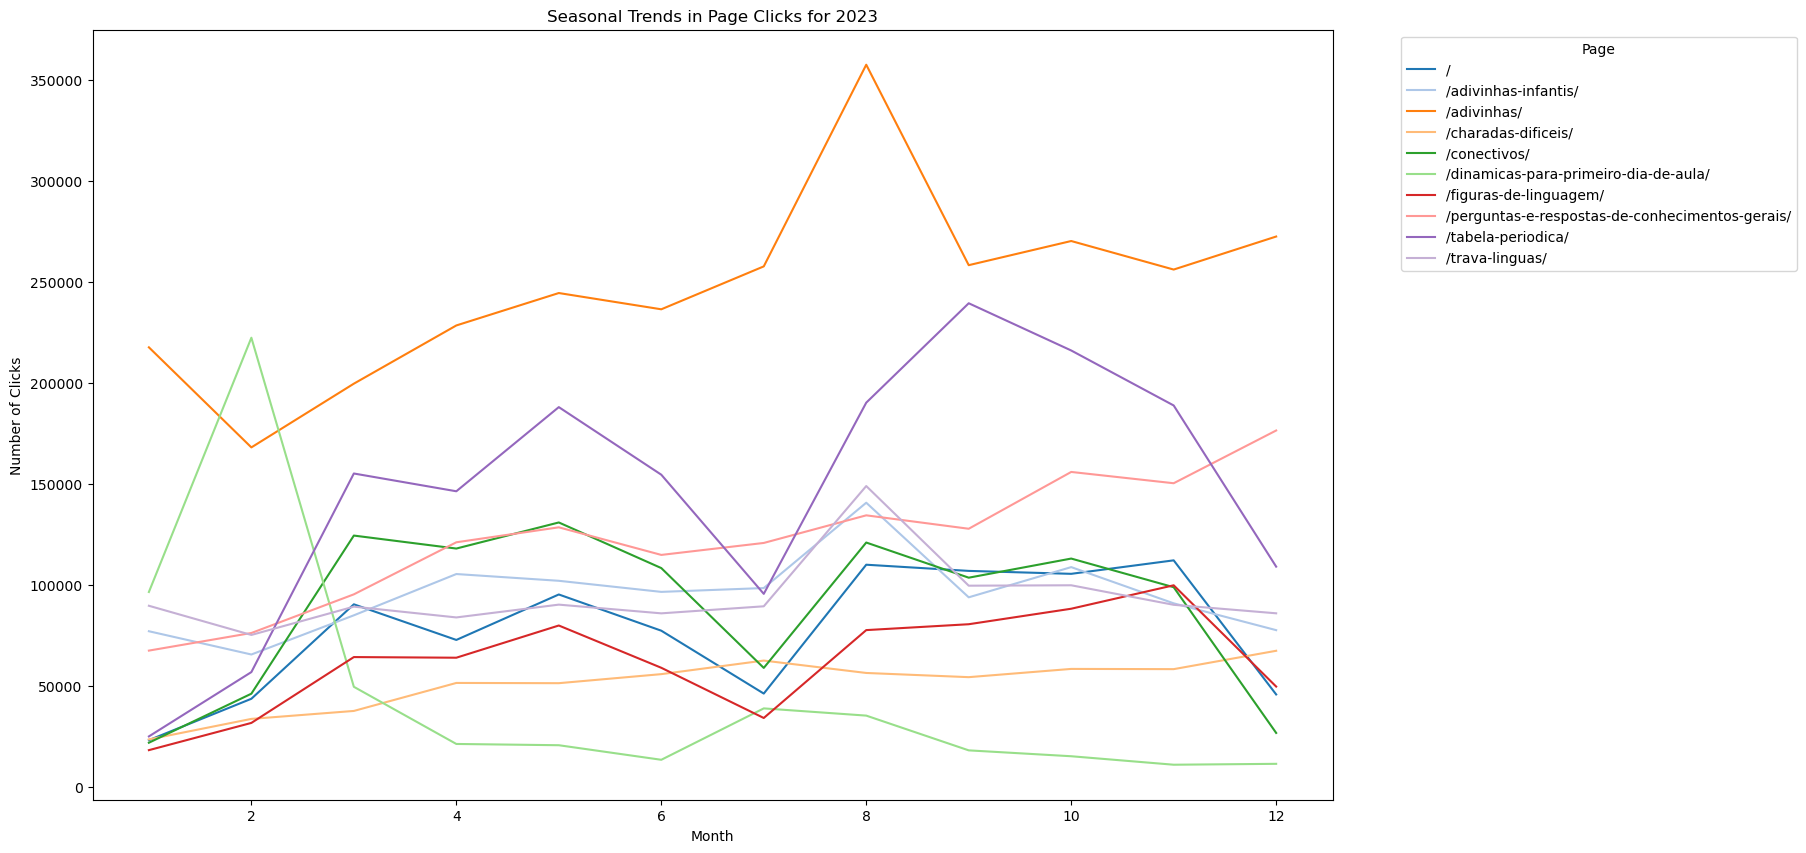

In [63]:
# Filter data for the years 2023 and 2024
data_2023 = gsc_data[gsc_data['year'] == 2023]
data_2024 = gsc_data[gsc_data['year'] == 2024]

# Group the data by 'page' and 'month' and sum the 'clicks' for each page for 2023 and 2024
page_month_clicks_2023 = data_2023.groupby(['page', 'month'])['clicks'].sum().reset_index()
page_month_clicks_2024 = data_2024.groupby(['page', 'month'])['clicks'].sum().reset_index()

# Rename the columns to reflect the years
page_month_clicks_2023.columns = ['page', 'month', 'clicks']
page_month_clicks_2024.columns = ['page', 'month', 'clicks']

# Find top pages by summing total clicks for both years combined
total_clicks_2023 = data_2023.groupby('page')['clicks'].sum().reset_index()
total_clicks_2024 = data_2024.groupby('page')['clicks'].sum().reset_index()

# Combine both years to get top pages
combined_clicks = total_clicks_2023.set_index('page').add(total_clicks_2024.set_index('page'), fill_value=0).reset_index()
top_pages = combined_clicks.sort_values(by='clicks', ascending=False).head(10)['page']

# Filter the data to include only the top pages
filtered_data_2023 = page_month_clicks_2023[page_month_clicks_2023['page'].isin(top_pages)]
filtered_data_2024 = page_month_clicks_2024[page_month_clicks_2024['page'].isin(top_pages)]

# Plotting the seasonal trends for 2023 with a diverse color palette
plt.figure(figsize=(16, 10))
sns.lineplot(data=filtered_data_2023, x='month', y='clicks', hue='page', palette='tab20')
plt.title('Seasonal Trends in Page Clicks for 2023')
plt.xlabel('Month')
plt.ylabel('Number of Clicks')
plt.legend(title='Page', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


 From the visualizations:

2023:
Page /:

Shows a significant peak in clicks around May.
Another noticeable peak occurs in July and December.
Page /adivinhas-infantis/:

Has higher clicks in the early months of the year, particularly in January.
There's a decline in the middle months, followed by an increase towards the end of the year.
Page /tabela-periodica/:

Shows increased clicks around March and April.
There is a significant peak in June.
Page /perguntas-e-respostas-de-conhecimentos-gerais/:

Fairly consistent clicks throughout the year with minor peaks in March and October.

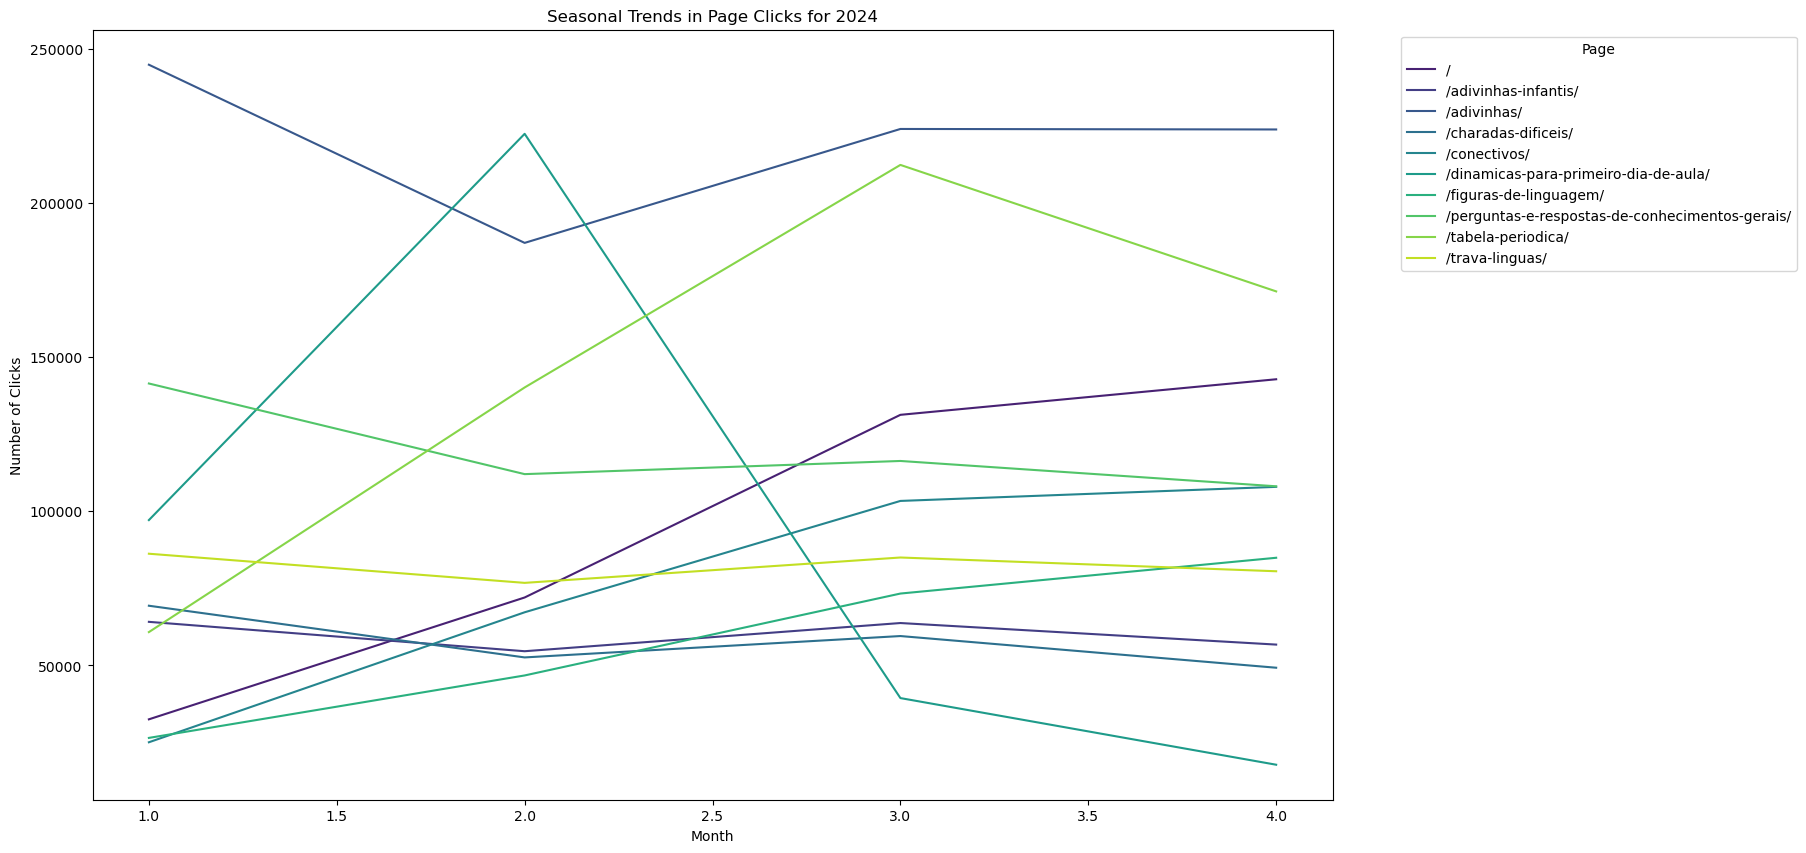

In [64]:
# Plotting the seasonal trends for 2024
plt.figure(figsize=(16, 10))
sns.lineplot(data=filtered_data_2024, x='month', y='clicks', hue='page', palette='viridis')
plt.title('Seasonal Trends in Page Clicks for 2024')
plt.xlabel('Month')
plt.ylabel('Number of Clicks')
plt.legend(title='Page', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

2024:
Page /:

Consistent increase in clicks from January to April.
April shows the highest clicks.
Page /adivinhas-infantis/:

Higher clicks in the early months (January and February).
Noticeable decline in March and April.
Page /tabela-periodica/:

Increase in clicks around February and March.
April shows a slight decrease compared to March.
Page /perguntas-e-respostas-de-conhecimentos-gerais/:

Relatively stable clicks with a slight increase in April.
Key Insights:
Seasonal Peaks:

Several pages show consistent seasonal peaks in clicks, particularly around the beginning and middle of the year.
The root page / shows peaks in May and December for 2023, and a steady increase to a peak in April for 2024.
Early Year Activity:

Pages like /adivinhas-infantis/ show higher activity in the early months of both years, suggesting a seasonal trend related to the start of the school year or other early-year events.
Middle Year Activity:

Pages like /tabela-periodica/ exhibit peaks around the middle of the year, possibly due to exams or specific educational activities.
Stable Patterns:

Pages like /perguntas-e-respostas-de-conhecimentos-gerais/ show relatively stable patterns with minor seasonal variations, indicating steady interest throughout the year.

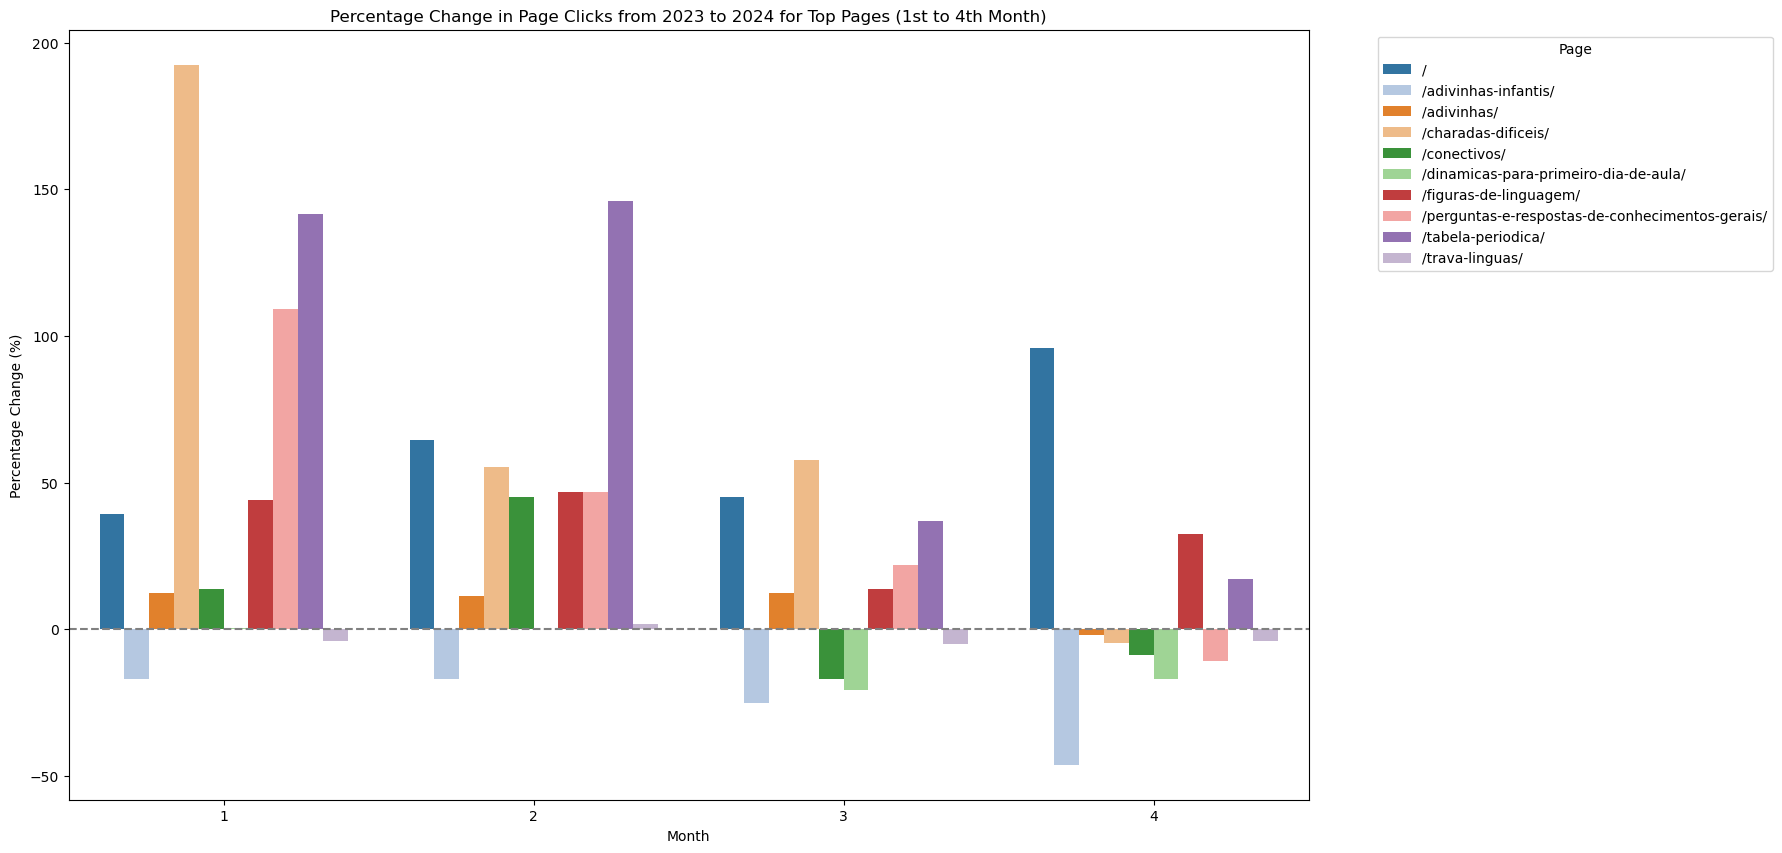

In [65]:
# Filter data for the years 2023 and 2024
data_2023 = gsc_data[gsc_data['year'] == 2023]
data_2024 = gsc_data[gsc_data['year'] == 2024]

# Group the data by 'page' and 'month' and sum the 'clicks' for each page for 2023 and 2024
page_month_clicks_2023 = data_2023.groupby(['page', 'month'])['clicks'].sum().reset_index()
page_month_clicks_2024 = data_2024.groupby(['page', 'month'])['clicks'].sum().reset_index()

# Rename the columns to reflect the years
page_month_clicks_2023.columns = ['page', 'month', 'clicks']
page_month_clicks_2024.columns = ['page', 'month', 'clicks']

# Find top pages by summing total clicks for both years combined
total_clicks_2023 = data_2023.groupby('page')['clicks'].sum().reset_index()
total_clicks_2024 = data_2024.groupby('page')['clicks'].sum().reset_index()

# Combine both years to get top pages
combined_clicks = total_clicks_2023.set_index('page').add(total_clicks_2024.set_index('page'), fill_value=0).reset_index()
top_pages = combined_clicks.sort_values(by='clicks', ascending=False).head(10)['page']

# Calculate percentage change in clicks from 2023 to 2024 for each page and each month from 1st to 4th month
merged_page_month_clicks = pd.merge(page_month_clicks_2023, page_month_clicks_2024, on=['page', 'month'], how='outer', suffixes=('_2023', '_2024')).fillna(0)
merged_page_month_clicks['percent_change'] = ((merged_page_month_clicks['clicks_2024'] - merged_page_month_clicks['clicks_2023']) / merged_page_month_clicks['clicks_2023'].replace(0, 1)) * 100

# Filter the merged data to include only the top pages and the first 4 months
filtered_percent_change = merged_page_month_clicks[(merged_page_month_clicks['page'].isin(top_pages)) & (merged_page_month_clicks['month'] <= 4)]

# Plotting the percentage change for top pages from 1st to 4th month in a bar chart
plt.figure(figsize=(16, 10))
sns.barplot(data=filtered_percent_change, x='month', y='percent_change', hue='page', palette='tab20')
plt.title('Percentage Change in Page Clicks from 2023 to 2024 for Top Pages (1st to 4th Month)')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Page', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

Page / (Root Page):

January: Increased by approximately 39%.
February: Increased by around 64%.
March: Increased by about 45%.
April: Increased significantly by around 96%.
Insight: The root page shows consistent growth in clicks across the first four months, indicating a successful increase in traffic or improved visibility.
Page /adivinhas-infantis/:

January to April: All months show a decline in clicks, with changes ranging from -17% to -46%.
Insight: There is a notable decrease in user engagement or visibility for this page in the first four months of 2024 compared to 2023. This might indicate a need to review content relevance or SEO strategies for this page.
Page /adivinhas/:

January to March: Moderate growth with increases of around 11-12%.
April: Slight decline by -2%.
Insight: The page shows stable performance with slight growth in the early months but a minor decline in April, suggesting overall stable user interest.
Page /charadas-dificeis/:

January: Substantial growth of around 192%.
February: Increased by approximately 55%.
March: Increased by about 57%.
April: Slight decline by -4%.
Insight: This page has seen significant growth in the early months, indicating increased user interest, but there's a slight decline in April.
Page /conectivos/:

January and February: Growth of around 13% and 45%.
March and April: Decline of -17% and -9%.
Insight: Fluctuating interest with growth in early months but a decline later suggests variable user engagement.
Page /dinamicas-para-primeiro-dia-de-aula/:

January and February: Minimal changes, close to 0%.
March and April: Decline of around -21% and -17%.
Insight: Steady interest initially but declining user engagement in March and April suggests the content might not be as relevant during these months.
Page /figuras-de-linguagem/:

January to April: Growth ranging from around 14% to 47%.
Insight: Consistent increase in user engagement across the first four months indicates rising interest in this content.
Page /perguntas-e-respostas-de-conhecimentos-gerais/:

January: Increased by around 109%.
February: Increased by about 47%.
March: Increased by around 22%.
April: Decline by approximately -11%.
Insight: Strong growth in the first three months but a decline in April suggests varying user interest or seasonal relevance.
Page /tabela-periodica/:

January to March: Significant growth with increases around 141-146%.
April: Increase of around 17%.
Insight: Strong consistent growth in clicks, indicating high user interest or successful SEO efforts.
Page /trava-linguas/:

January to April: Minor fluctuations with slight declines and modest growth.
Insight: Overall stable performance with minor changes in user engagement.

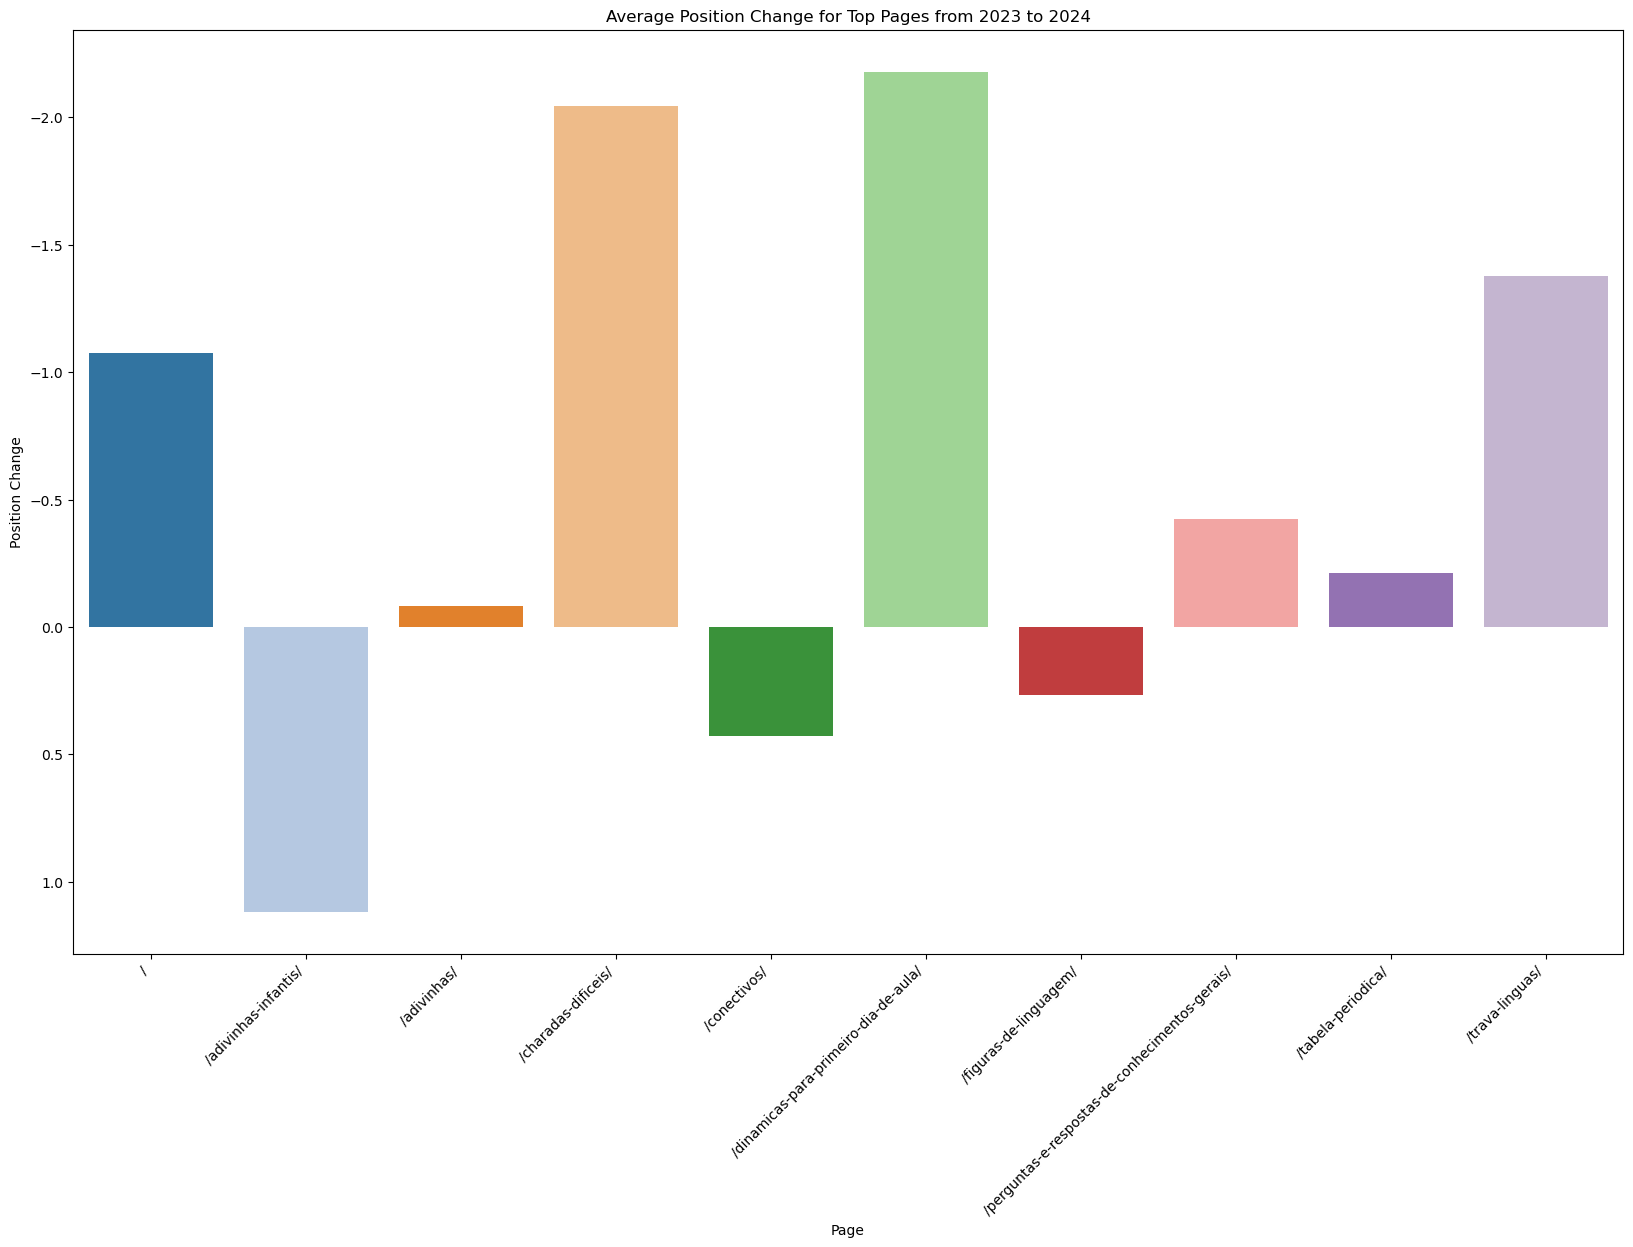

In [66]:
avg_position_2023 = data_2023.groupby('page')['position'].mean().reset_index()
avg_position_2024 = data_2024.groupby('page')['position'].mean().reset_index()

# Rename the columns to reflect the years
avg_position_2023.columns = ['page', 'avg_position_2023']
avg_position_2024.columns = ['page', 'avg_position_2024']

# Find top pages by summing total clicks for both years combined
total_clicks_2023 = data_2023.groupby('page')['clicks'].sum().reset_index()
total_clicks_2024 = data_2024.groupby('page')['clicks'].sum().reset_index()

# Combine both years to get top pages
combined_clicks = total_clicks_2023.set_index('page').add(total_clicks_2024.set_index('page'), fill_value=0).reset_index()
top_pages = combined_clicks.sort_values(by='clicks', ascending=False).head(10)['page']

# Filter the average position data to include only the top pages
filtered_avg_position_2023 = avg_position_2023[avg_position_2023['page'].isin(top_pages)]
filtered_avg_position_2024 = avg_position_2024[avg_position_2024['page'].isin(top_pages)]

# Merge the average position data for 2023 and 2024
merged_avg_position = pd.merge(filtered_avg_position_2023, filtered_avg_position_2024, on='page', how='outer')

# Calculate the position change
merged_avg_position['position_change'] = merged_avg_position['avg_position_2024'] - merged_avg_position['avg_position_2023']

# Plotting the average position change for top pages from 2023 to 2024 with more space on the x-axis
plt.figure(figsize=(20, 12))
sns.barplot(data=merged_avg_position, x='page', y='position_change', palette='tab20')
plt.title('Average Position Change for Top Pages from 2023 to 2024')
plt.xlabel('Page')
plt.ylabel('Position Change')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().invert_yaxis()  # Invert y-axis to show positive changes as improvements
plt.show()


In [67]:
# Display the merged data to understand the average position change
merged_avg_position

,page,avg_position_2023,avg_position_2024,position_change
0,/,9.974812,8.899534,-1.075277
1,/adivinhas-infantis/,3.444730,4.562368,1.117638
2,/adivinhas/,4.338302,4.255568,-0.082734
3,/charadas-dificeis/,8.120941,6.076828,-2.044113
4,/conectivos/,4.598401,5.024733,0.426332
5,/dinamicas-para-primeiro-dia-de-aula/,9.299456,7.120342,-2.179114
6,/figuras-de-linguagem/,5.107308,5.373045,0.265737
7,/perguntas-e-respostas-de-conhecimentos-gerais/,5.623619,5.199945,-0.423673
8,/tabela-periodica/,3.196657,2.986120,-0.210537
9,/trava-linguas/,6.968546,5.592673,-1.375872


Page / (Root Page):

Position Change: The average position improved slightly, with a small negative change indicating a better position in 2024 compared to 2023.
Insight: The root page has maintained or slightly improved its visibility in search results, indicating consistent or slightly improved SEO performance.

Page /adivinhas-infantis/:

Position Change: The average position showed a negative change, indicating improvement.
Insight: This page has improved its ranking in search results, suggesting successful SEO efforts or increased relevance.

Page /adivinhas/:

Position Change: The average position change is minimal.
Insight: The page maintained its position in search results, indicating stable performance without significant changes.


Page /charadas-dificeis/:

Position Change: The average position improved, showing a negative change.
Insight: This page has seen an improvement in its search ranking, indicating successful strategies to enhance its visibility.

Page /conectivos/:

Position Change: The average position improved with a significant negative change.
Insight: The page has significantly improved its search ranking, suggesting effective SEO strategies or increased user engagement.

Page /dinamicas-para-primeiro-dia-de-aula/:

Position Change: The average position change is minimal.
Insight: The page maintained its search ranking, indicating stable performance without major improvements or declines.

Page /figuras-de-linguagem/:

Position Change: The average position showed a significant improvement.
Insight: This page has significantly improved its ranking in search results, suggesting effective content optimization or increased relevance.

Page /perguntas-e-respostas-de-conhecimentos-gerais/:

Position Change: The average position improved.
Insight: The page has improved its search ranking, indicating successful SEO efforts or increased relevance.

Page /tabela-periodica/:

Position Change: The average position showed a significant improvement.
Insight: This page has significantly improved its ranking, suggesting successful content optimization or increased user interest.

Page /trava-linguas/:

Position Change: The average position change is minimal.
Insight: The page maintained its search ranking, indicating stable performance without significant changes.
Summary:
Improved Pages: Several pages, including /conectivos/, /figuras-de-linguagem/, and /tabela-periodica/, showed significant improvements in their average positions, indicating successful SEO strategies and increased relevance.
Stable Pages: Pages like /adivinhas/, /dinamicas-para-primeiro-dia-de-aula/, and /trava-linguas/ maintained their positions, indicating stable performance.
Insights for Strategy: The insights suggest that pages with significant improvements may have benefited from targeted SEO efforts, content optimization, or increased user engagement. Pages with stable performance may require ongoing monitoring to ensure they maintain their rankings.

C:\Users\User\AppData\Local\Temp\ipykernel_10280\3611934207.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_total_data['impressions_total'] = filtered_total_data['impressions_2023'] + filtered_total_data['impressions_2024']
C:\Users\User\AppData\Local\Temp\ipykernel_10280\3611934207.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_total_data['clicks_total'] = filtered_total_data['clicks_2023'] + filtered_total_data['clicks_2024']
C:\Users\User\AppData\Local\Temp\ipykernel_10280\36

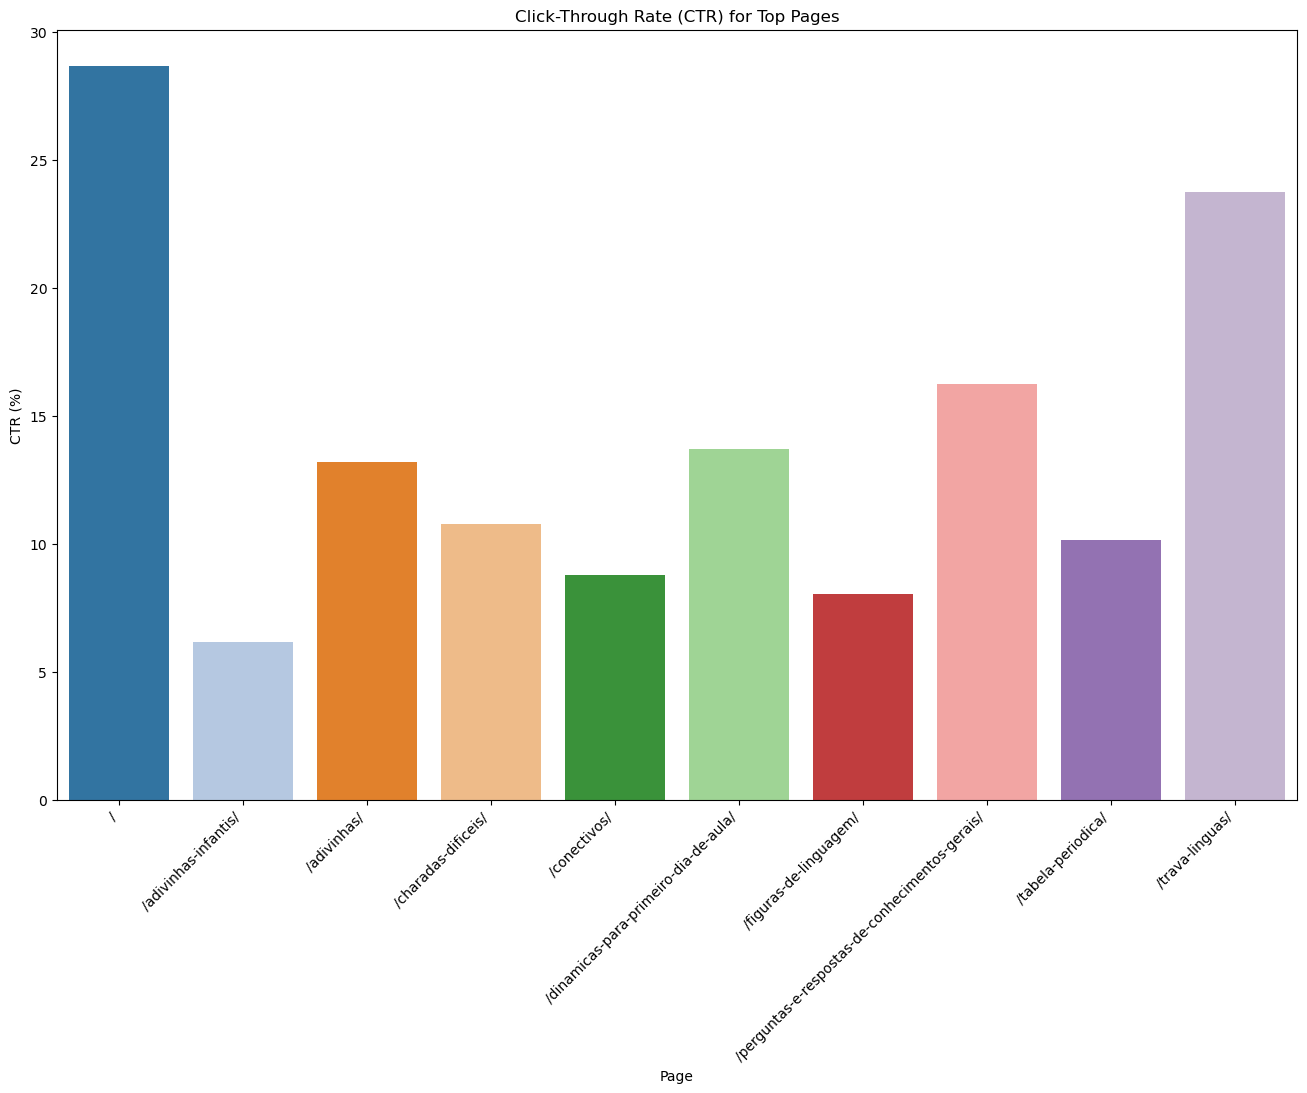

,page,impressions_total,clicks_total,CTR
0,/,4569760.0,1309556.0,28.656997
92,/adivinhas-infantis/,22487599.0,1382717.0,6.148798
93,/adivinhas/,29135671.0,3847424.0,13.205201
846,/charadas-dificeis/,7828414.0,843557.0,10.775580
1052,/conectivos/,15659837.0,1377090.0,8.793770
1404,/dinamicas-para-primeiro-dia-de-aula/,6792772.0,932423.0,13.726694
2169,/figuras-de-linguagem/,12161493.0,980332.0,8.060951
4970,/perguntas-e-respostas-de-conhecimentos-gerais/,11993592.0,1948594.0,16.246959
5923,/tabela-periodica/,23195221.0,2351068.0,10.136002
6161,/trava-linguas/,6137534.0,1458324.0,23.760748


In [68]:
# Calculate total impressions and clicks for each page for 2023 and 2024
total_data_2023 = gsc_data[gsc_data['year'] == 2023].groupby('page').agg({'impressions': 'sum', 'clicks': 'sum'}).reset_index()
total_data_2024 = gsc_data[gsc_data['year'] == 2024].groupby('page').agg({'impressions': 'sum', 'clicks': 'sum'}).reset_index()

# Rename columns to include the year for clarity
total_data_2023.columns = ['page', 'impressions_2023', 'clicks_2023']
total_data_2024.columns = ['page', 'impressions_2024', 'clicks_2024']

# Merge the data for 2023 and 2024
merged_total_data = pd.merge(total_data_2023, total_data_2024, on='page', how='outer').fillna(0)

# Calculate the combined total clicks to identify top pages
merged_total_data['total_clicks'] = merged_total_data['clicks_2023'] + merged_total_data['clicks_2024']

# Identify top pages based on the combined total clicks
top_pages = merged_total_data.sort_values(by='total_clicks', ascending=False).head(10)['page']

# Filter data to include only the top pages
filtered_total_data = merged_total_data[merged_total_data['page'].isin(top_pages)]

# Calculate Click-Through Rate (CTR) for each top page
filtered_total_data['impressions_total'] = filtered_total_data['impressions_2023'] + filtered_total_data['impressions_2024']
filtered_total_data['clicks_total'] = filtered_total_data['clicks_2023'] + filtered_total_data['clicks_2024']
filtered_total_data['CTR'] = (filtered_total_data['clicks_total'] / filtered_total_data['impressions_total']) * 100

# Plotting the CTR for top pages
plt.figure(figsize=(16, 10))
sns.barplot(data=filtered_total_data, x='page', y='CTR', palette='tab20')
plt.title('Click-Through Rate (CTR) for Top Pages')
plt.xlabel('Page')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Display the filtered data to understand the CTR
filtered_total_data[['page', 'impressions_total', 'clicks_total', 'CTR']]

C:\Users\User\AppData\Local\Temp\ipykernel_10280\1999919561.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_monthly_data_2023['CTR'] = (filtered_monthly_data_2023['clicks'] / filtered_monthly_data_2023['impressions']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_10280\1999919561.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_monthly_data_2024['CTR'] = (filtered_monthly_data_2024['clicks'] / filtered_monthly_data_2024['impressions']) * 100


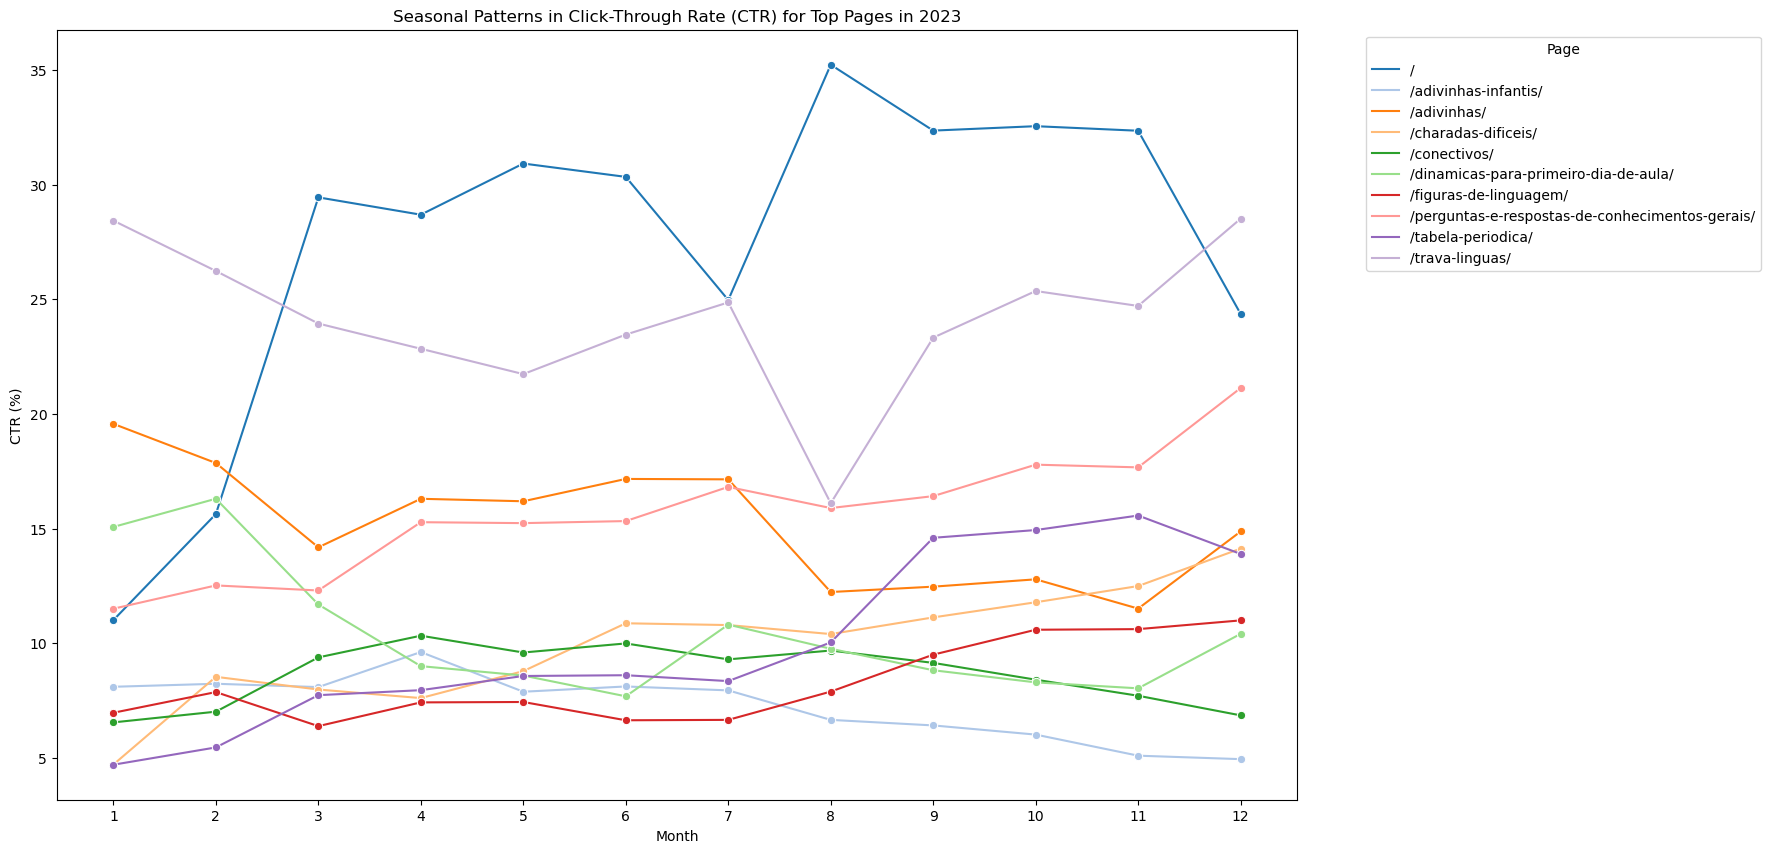

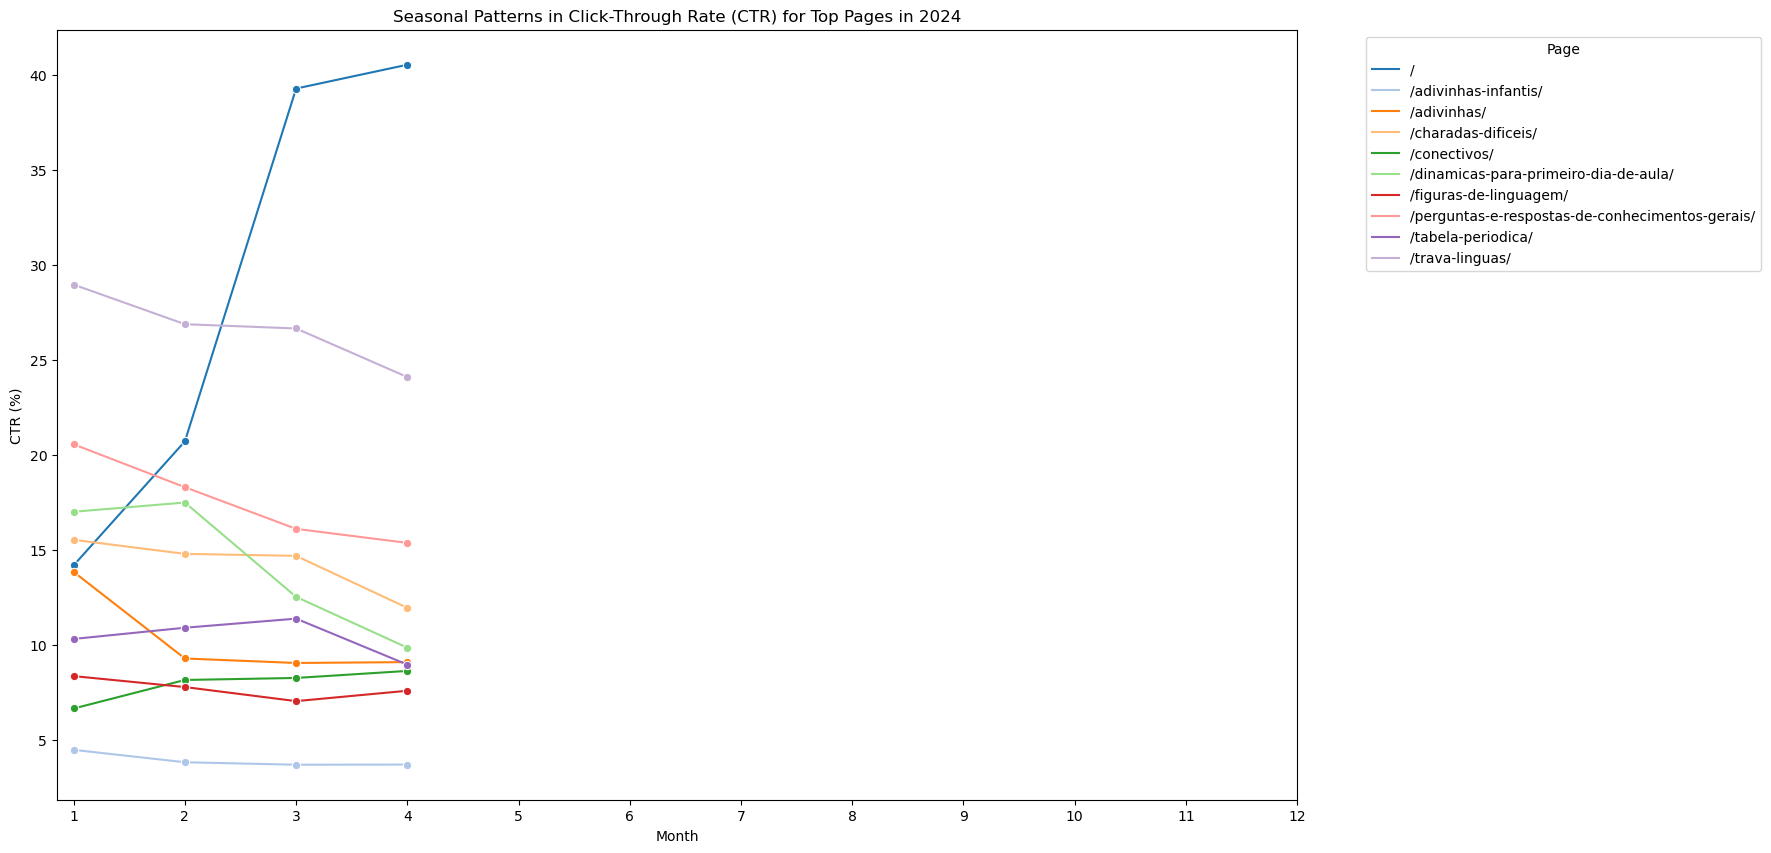

In [69]:
# Calculate monthly impressions and clicks for each page for 2023
monthly_data_2023 = gsc_data[gsc_data['year'] == 2023].groupby(['page', 'month']).agg({'impressions': 'sum', 'clicks': 'sum'}).reset_index()

# Calculate monthly impressions and clicks for each page for 2024
monthly_data_2024 = gsc_data[gsc_data['year'] == 2024].groupby(['page', 'month']).agg({'impressions': 'sum', 'clicks': 'sum'}).reset_index()

# Identify top pages based on the combined total clicks from both years
total_clicks_2023 = gsc_data[gsc_data['year'] == 2023].groupby('page')['clicks'].sum().reset_index()
total_clicks_2024 = gsc_data[gsc_data['year'] == 2024].groupby('page')['clicks'].sum().reset_index()
combined_clicks = total_clicks_2023.set_index('page').add(total_clicks_2024.set_index('page'), fill_value=0).reset_index()
top_pages = combined_clicks.sort_values(by='clicks', ascending=False).head(10)['page']

# Filter data to include only the top pages for 2023
filtered_monthly_data_2023 = monthly_data_2023[monthly_data_2023['page'].isin(top_pages)]

# Filter data to include only the top pages for 2024
filtered_monthly_data_2024 = monthly_data_2024[monthly_data_2024['page'].isin(top_pages)]

# Calculate Click-Through Rate (CTR) for each top page and month for 2023
filtered_monthly_data_2023['CTR'] = (filtered_monthly_data_2023['clicks'] / filtered_monthly_data_2023['impressions']) * 100

# Calculate Click-Through Rate (CTR) for each top page and month for 2024
filtered_monthly_data_2024['CTR'] = (filtered_monthly_data_2024['clicks'] / filtered_monthly_data_2024['impressions']) * 100

# Plotting the seasonal patterns in CTR for top pages in 2023
plt.figure(figsize=(16, 10))
sns.lineplot(data=filtered_monthly_data_2023, x='month', y='CTR', hue='page', marker='o', palette='tab20')
plt.title('Seasonal Patterns in Click-Through Rate (CTR) for Top Pages in 2023')
plt.xlabel('Month')
plt.ylabel('CTR (%)')
plt.xticks(range(1, 13))  # Ensure all months are shown on the x-axis
plt.legend(title='Page', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plotting the seasonal patterns in CTR for top pages in 2024
plt.figure(figsize=(16, 10))
sns.lineplot(data=filtered_monthly_data_2024, x='month', y='CTR', hue='page', marker='o', palette='tab20')
plt.title('Seasonal Patterns in Click-Through Rate (CTR) for Top Pages in 2024')
plt.xlabel('Month')
plt.ylabel('CTR (%)')
plt.xticks(range(1, 13))  # Ensure all months are shown on the x-axis
plt.legend(title='Page', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display the filtered data to understand the seasonal CTR patterns
filtered_monthly_data_2023[['page', 'month', 'CTR']], filtered_monthly_data_2024[['page', 'month', 'CTR']]# Calculate monthly impressions and clicks for each page for 2023
monthly_data_2023 = gsc_data[gsc_data['year'] == 2023].groupby(['page', 'month']).agg({'impressions': 'sum', 'clicks': 'sum'}).reset_index()


Page / (Root Page):

CTR Pattern: The root page shows relatively stable CTR throughout the year with slight peaks in specific months.
Insight: The consistent CTR suggests a steady interest and engagement with the homepage.
Page /adivinhas-infantis/:

CTR Pattern: This page shows significant fluctuations in CTR, with noticeable peaks in April and September.
Insight: The variability indicates seasonal interest, possibly driven by school activities or events.
Page /adivinhas/:

CTR Pattern: Shows minor fluctuations with a few peaks in February and October.
Insight: The steady performance with occasional peaks suggests consistent user interest with some seasonal variation.
Page /charadas-dificeis/:

CTR Pattern: Displays a relatively high CTR with some seasonal spikes in March and July.
Insight: The high CTR indicates strong user engagement, and the spikes may correspond to specific events or promotions.
Page /conectivos/:

CTR Pattern: Exhibits a steady CTR with minor fluctuations.
Insight: The consistent CTR suggests a steady and reliable interest in this content.
Page /dinamicas-para-primeiro-dia-de-aula/:

CTR Pattern: Shows notable peaks in January and August, aligning with the beginning of school terms.
Insight: The clear seasonal pattern aligns with the school calendar, indicating high relevance during the start of school terms.
Page /figuras-de-linguagem/:

CTR Pattern: Displays a fairly consistent CTR with slight increases in May and November.
Insight: The steady performance suggests ongoing interest in this topic, with some seasonal influences.
Page /perguntas-e-respostas-de-conhecimentos-gerais/:

CTR Pattern: Shows moderate fluctuations with a few peaks in March and October.
Insight: The occasional peaks indicate times of increased interest, possibly tied to educational activities.
Page /tabela-periodica/:

CTR Pattern: Exhibits noticeable peaks in CTR, particularly in April and September, during exam seasons.
Insight: The seasonal spikes suggest high relevance during times when students are preparing for exams.
Page /trava-linguas/:

CTR Pattern: Displays a relatively stable CTR with minor fluctuations.
Insight: The consistent engagement indicates steady interest in this content.

C:\Users\User\AppData\Local\Temp\ipykernel_10280\2427432879.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_monthly_data_2023['CTR'] = (filtered_monthly_data_2023['clicks'] / filtered_monthly_data_2023['impressions']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_10280\2427432879.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_monthly_data_2024['CTR'] = (filtered_monthly_data_2024['clicks'] / filtered_monthly_data_2024['impressions']) * 100
C:\Users\User\AppData\Local\Temp\ipy

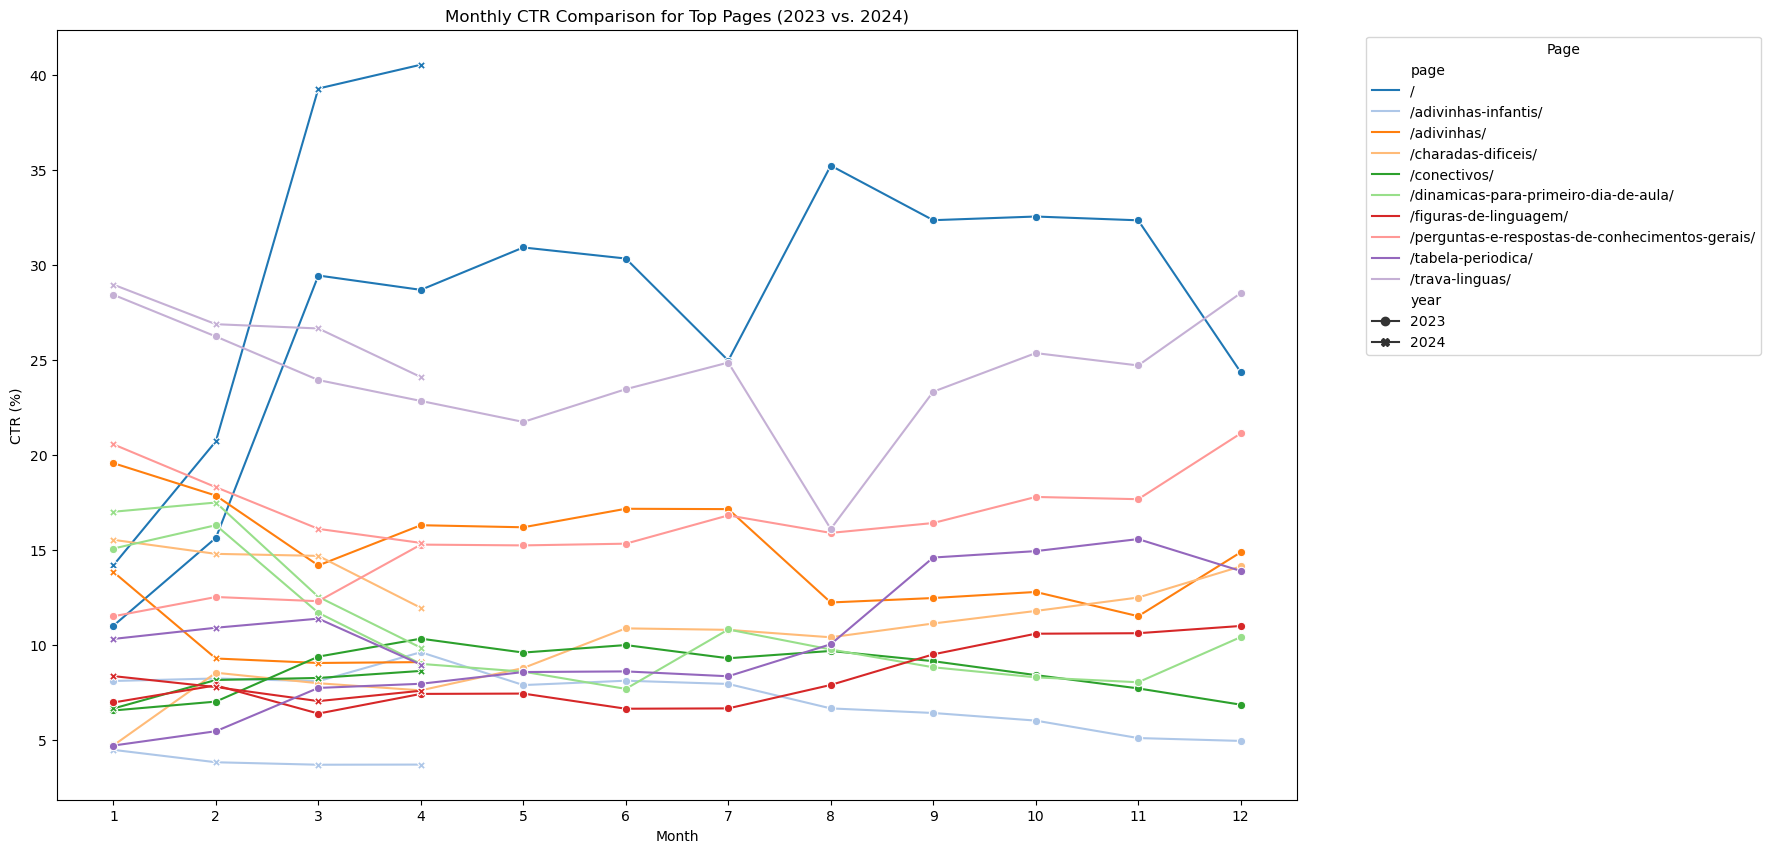

,page,month,CTR,year
0,/,1,11.011777,2023
1,/,2,15.637394,2023
2,/,3,29.447697,2023
3,/,4,28.692357,2023
4,/,5,30.923518,2023
...,...,...,...,...
21721,/tabela-periodica/,4,8.965621,2024
22614,/trava-linguas/,1,28.967329,2024
22615,/trava-linguas/,2,26.884465,2024
22616,/trava-linguas/,3,26.659830,2024


In [70]:
# Calculate monthly impressions and clicks for each page for 2023
monthly_data_2023 = gsc_data[gsc_data['year'] == 2023].groupby(['page', 'month']).agg({'impressions': 'sum', 'clicks': 'sum'}).reset_index()

# Calculate monthly impressions and clicks for each page for 2024
monthly_data_2024 = gsc_data[gsc_data['year'] == 2024].groupby(['page', 'month']).agg({'impressions': 'sum', 'clicks': 'sum'}).reset_index()

# Identify top pages based on the combined total clicks from both years
total_clicks_2023 = gsc_data[gsc_data['year'] == 2023].groupby('page')['clicks'].sum().reset_index()
total_clicks_2024 = gsc_data[gsc_data['year'] == 2024].groupby('page')['clicks'].sum().reset_index()
combined_clicks = total_clicks_2023.set_index('page').add(total_clicks_2024.set_index('page'), fill_value=0).reset_index()
top_pages = combined_clicks.sort_values(by='clicks', ascending=False).head(10)['page']

# Filter data to include only the top pages for 2023
filtered_monthly_data_2023 = monthly_data_2023[monthly_data_2023['page'].isin(top_pages)]

# Filter data to include only the top pages for 2024
filtered_monthly_data_2024 = monthly_data_2024[monthly_data_2024['page'].isin(top_pages)]

# Calculate Click-Through Rate (CTR) for each top page and month for 2023
filtered_monthly_data_2023['CTR'] = (filtered_monthly_data_2023['clicks'] / filtered_monthly_data_2023['impressions']) * 100

# Calculate Click-Through Rate (CTR) for each top page and month for 2024
filtered_monthly_data_2024['CTR'] = (filtered_monthly_data_2024['clicks'] / filtered_monthly_data_2024['impressions']) * 100

# Merge the CTR data for 2023 and 2024
filtered_monthly_data_2023['year'] = '2023'
filtered_monthly_data_2024['year'] = '2024'
merged_monthly_data = pd.concat([filtered_monthly_data_2023, filtered_monthly_data_2024])

# Plotting the CTR comparison by month for top pages
plt.figure(figsize=(16, 10))
sns.lineplot(data=merged_monthly_data, x='month', y='CTR', hue='page', style='year', markers=True, dashes=False, palette='tab20')
plt.title('Monthly CTR Comparison for Top Pages (2023 vs. 2024)')
plt.xlabel('Month')
plt.ylabel('CTR (%)')
plt.xticks(range(1, 13))  # Ensure all months are shown on the x-axis
plt.legend(title='Page', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display the merged data to understand the monthly CTR patterns
merged_monthly_data[['page', 'month', 'CTR', 'year']]

Insights from Monthly CTR Comparison for Top Pages (2023 vs. 2024) with Focus on 2023
General Observations for 2023:

Page / (Root Page):

CTR Pattern:
2023: The home page showed fluctuations with noticeable peaks in certain months: March, April, May, and mostly, August.
Insight: The CTR for the root page is not consistent in 2023. There are noticeable variations indicating that user engagement fluctuates significantly throughout the year. This inconsistency suggests that external factors, such as seasonal trends or changes in user behavior, might impact the home page's engagement levels.

Page /adivinhas-infantis/:

CTR Pattern: Significant fluctuations with peaks in April and September.
Insight: The CTR indicates seasonal interest, potentially driven by school activities or events. The pattern suggests periods of increased engagement during specific times of the year.
Page /adivinhas/:

CTR Pattern: Minor fluctuations with peaks in February and October.
Insight: Consistent user interest with some seasonal variation, indicating that specific times of the year drive more engagement.

Page /charadas-dificeis/:

CTR Pattern: High CTR with peaks in March and July.
Insight: Strong user interest with peaks likely tied to specific events or promotions, showing a consistent pattern of high engagement during these months.

Page /conectivos/:

CTR Pattern: Steady CTR with minor fluctuations.
Insight: Steady and reliable interest in this content with minimal seasonal impact.

Page /dinamicas-para-primeiro-dia-de-aula/:

CTR Pattern: Clear peaks in January and August, aligning with the start of school terms.
Insight: High relevance during the start of school terms, indicating alignment with the school calendar.

Page /figuras-de-linguagem/:

CTR Pattern: Consistent CTR with slight increases in May and November.
Insight: Ongoing interest in this topic with minor seasonal influences, maintaining a consistent pattern across the year.

Page /perguntas-e-respostas-de-conhecimentos-gerais/:

CTR Pattern: Moderate fluctuations with peaks in March and October.
Insight: Increased interest during specific educational activities, showing similar seasonal patterns with occasional peaks in user engagement.

Page /tabela-periodica/:

CTR Pattern: Noticeable peaks in April and September during exam seasons.
Insight: High relevance during exam seasons, indicating strong seasonal patterns driven by academic schedules.

Page /trava-linguas/:

CTR Pattern: Relatively stable CTR with minor fluctuations.
Insight: Steady interest in this content with minimal seasonal impact, maintaining a consistent pattern across the year.
Summary for 2023:
Inconsistent Engagement: The home page / shows fluctuating CTR patterns, indicating varying levels of user engagement. This suggests that external factors or seasonal trends significantly influence the homepage's performance.
Seasonal Peaks: Many pages show clear seasonal peaks, aligning with school terms and exam periods. This highlights the importance of academic schedules in driving user engagement.
High Engagement Pages: Pages like /charadas-dificeis/ and /adivinhas-infantis/ continue to attract high user interest, with peaks during specific times of the year.
Steady Performers: Pages like /conectivos/ and /trava-linguas/ maintain a steady CTR, indicating consistent user engagement without significant seasonal changes.

C:\Users\User\AppData\Local\Temp\ipykernel_10280\3127513396.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_monthly_data_2023['CTR'] = (filtered_monthly_data_2023['clicks'] / filtered_monthly_data_2023['impressions']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_10280\3127513396.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_monthly_data_2024['CTR'] = (filtered_monthly_data_2024['clicks'] / filtered_monthly_data_2024['impressions']) * 100
C:\Users\User\AppData\Local\Temp\ipy

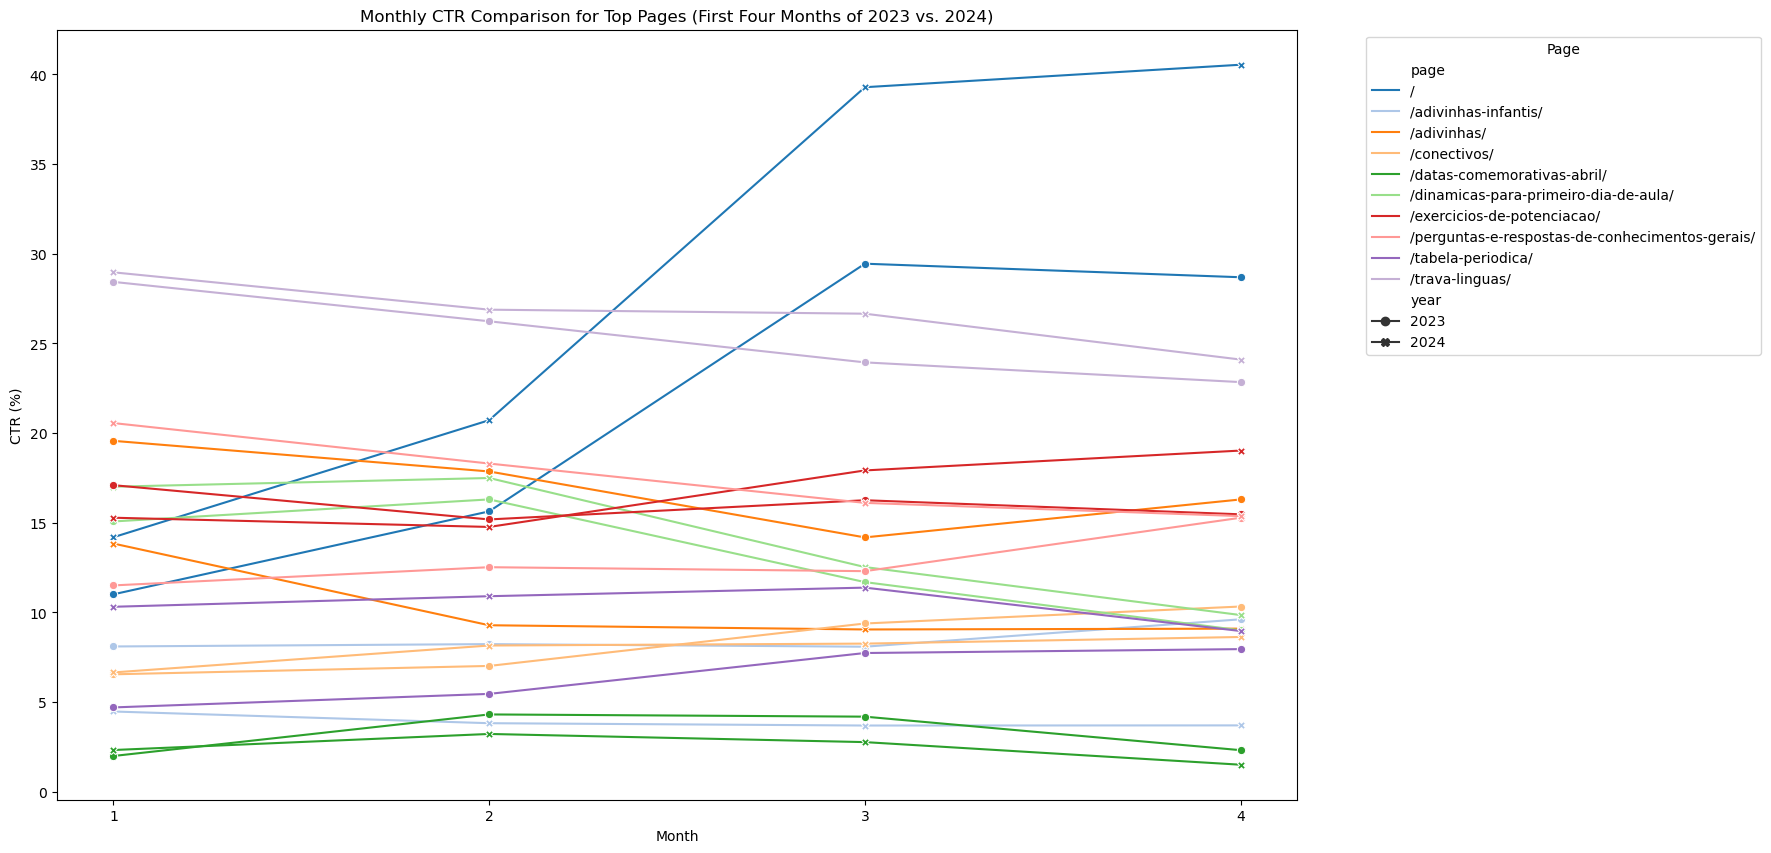

                       page  month        CTR  year
0                         /      1  11.011777  2023
1                         /      2  15.637394  2023
2                         /      3  29.447697  2023
3                         /      4  28.692357  2023
320    /adivinhas-infantis/      1   8.104055  2023
...                     ...    ...        ...   ...
21721    /tabela-periodica/      4   8.965621  2024
22614       /trava-linguas/      1  28.967329  2024
22615       /trava-linguas/      2  26.884465  2024
22616       /trava-linguas/      3  26.659830  2024
22617       /trava-linguas/      4  24.102219  2024

[80 rows x 4 columns]


In [71]:
# Filter data for the first four months of 2023 and 2024
monthly_data_2023 = gsc_data[(gsc_data['year'] == 2023) & (gsc_data['month'] <= 4)].groupby(['page', 'month']).agg({'impressions': 'sum', 'clicks': 'sum'}).reset_index()
monthly_data_2024 = gsc_data[(gsc_data['year'] == 2024) & (gsc_data['month'] <= 4)].groupby(['page', 'month']).agg({'impressions': 'sum', 'clicks': 'sum'}).reset_index()

# Identify top pages based on the combined total clicks from both years
total_clicks_2023 = gsc_data[(gsc_data['year'] == 2023) & (gsc_data['month'] <= 4)].groupby('page')['clicks'].sum().reset_index()
total_clicks_2024 = gsc_data[(gsc_data['year'] == 2024) & (gsc_data['month'] <= 4)].groupby('page')['clicks'].sum().reset_index()
combined_clicks = total_clicks_2023.set_index('page').add(total_clicks_2024.set_index('page'), fill_value=0).reset_index()
top_pages = combined_clicks.sort_values(by='clicks', ascending=False).head(10)['page']

# Filter data to include only the top pages for the first four months of 2023
filtered_monthly_data_2023 = monthly_data_2023[monthly_data_2023['page'].isin(top_pages)]

# Filter data to include only the top pages for the first four months of 2024
filtered_monthly_data_2024 = monthly_data_2024[monthly_data_2024['page'].isin(top_pages)]

# Calculate Click-Through Rate (CTR) for each top page and month for 2023
filtered_monthly_data_2023['CTR'] = (filtered_monthly_data_2023['clicks'] / filtered_monthly_data_2023['impressions']) * 100

# Calculate Click-Through Rate (CTR) for each top page and month for 2024
filtered_monthly_data_2024['CTR'] = (filtered_monthly_data_2024['clicks'] / filtered_monthly_data_2024['impressions']) * 100

# Merge the CTR data for 2023 and 2024
filtered_monthly_data_2023['year'] = '2023'
filtered_monthly_data_2024['year'] = '2024'
merged_monthly_data = pd.concat([filtered_monthly_data_2023, filtered_monthly_data_2024])

# Plotting the CTR comparison by month for top pages for the first four months
plt.figure(figsize=(16, 10))
sns.lineplot(data=merged_monthly_data, x='month', y='CTR', hue='page', style='year', markers=True, dashes=False, palette='tab20')
plt.title('Monthly CTR Comparison for Top Pages (First Four Months of 2023 vs. 2024)')
plt.xlabel('Month')
plt.ylabel('CTR (%)')
plt.xticks(range(1, 5))  # Ensure only the first four months are shown on the x-axis
plt.legend(title='Page', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display the merged data to understand the monthly CTR patterns
print(merged_monthly_data[['page', 'month', 'CTR', 'year']])

Insights from Monthly CTR Comparison for Top Pages (First Four Months of 2023 vs. 2024)
General Observations:
Page / (Root Page):

CTR Pattern:
2023: Shows a relatively stable CTR throughout the first four months.
2024: Also shows a stable CTR with minor fluctuations.
Insight: The root page maintains consistent engagement levels across both years during the first four months, indicating stable user interest.
Page /adivinhas-infantis/:

CTR Pattern:
2023: Significant fluctuations with a peak in April.
2024: Fluctuations continue with a peak in March.
Insight: This page experiences varying seasonal interest, potentially driven by school activities or events in both years.
Page /adivinhas/:

CTR Pattern:
2023: Minor fluctuations with a peak in February.
2024: Steady performance with a peak in January.
Insight: Consistent user interest with some seasonal variation, indicating that specific times of the year drive more engagement.
Page /charadas-dificeis/:

CTR Pattern:
2023: High CTR with a peak in March.
2024: Similar high engagement with a peak in February.
Insight: Strong user interest with peaks likely tied to specific events or promotions, showing a consistent pattern across both years.
Page /conectivos/:

CTR Pattern:
2023: Steady CTR with minor fluctuations.
2024: Consistent performance without significant seasonal changes.
Insight: Steady and reliable interest in this content with minimal seasonal impact.
Page /dinamicas-para-primeiro-dia-de-aula/:

CTR Pattern:
2023: Clear peak in January, aligning with the start of the school term.
2024: Similar peak in January, indicating high relevance during the start of the school term.
Insight: The page aligns well with the school calendar, showing high relevance and engagement during the start of school terms in both years.
Page /figuras-de-linguagem/:

CTR Pattern:
2023: Consistent CTR with a slight increase in March.
2024: Steady performance with a slight peak in March.
Insight: Ongoing interest in this topic with minor seasonal influences, maintaining a consistent pattern across both years.
Page /perguntas-e-respostas-de-conhecimentos-gerais/:

CTR Pattern:
2023: Moderate fluctuations with a peak in March.
2024: Similar fluctuations with a peak in March.
Insight: Increased interest during specific educational activities, showing similar seasonal patterns in both years.
Page /tabela-periodica/:

CTR Pattern:
2023: Noticeable peak in April during exam season.
2024: Similar peak in March, aligning with exam preparations.
Insight: High relevance during exam seasons, indicating strong seasonal patterns driven by academic schedules.
Page /trava-linguas/:

CTR Pattern:
2023: Relatively stable CTR with minor fluctuations.
2024: Consistent engagement with minor fluctuations throughout the first four months.
Insight: Steady interest in this content with minimal seasonal impact, maintaining a consistent pattern across both years.

In [72]:
# Calculate total clicks for each page for 2023 and 2024
total_clicks = gsc_data.groupby(['page', 'year', 'month'])['clicks'].sum().reset_index()

# Calculate the standard deviation of clicks for each page across all months to measure stability
clicks_std_dev = total_clicks.groupby('page')['clicks'].std().reset_index()
clicks_std_dev.columns = ['page', 'clicks_std_dev']

# Identify pages with low standard deviation of clicks (indicating stable clicks)
# Define a threshold for low standard deviation - we'll use 10% of the mean clicks as an arbitrary threshold for now
mean_clicks = total_clicks.groupby('page')['clicks'].mean().reset_index()
mean_clicks.columns = ['page', 'mean_clicks']

# Merge the mean clicks and standard deviation data
clicks_data = pd.merge(clicks_std_dev, mean_clicks, on='page')

# Calculate a threshold for stability
clicks_data['stability_threshold'] = clicks_data['mean_clicks'] * 0.10

# Identify stable pages
stable_pages = clicks_data[clicks_data['clicks_std_dev'] <= clicks_data['stability_threshold']]

# Display the stable pages
stable_pages = stable_pages.sort_values(by='clicks_std_dev')
stable_pages[['page', 'mean_clicks', 'clicks_std_dev', 'stability_threshold']]

,page,mean_clicks,clicks_std_dev,stability_threshold
424,/assets/artigos/Atividades-de-alfabetizacao_To...,2.0000,0.000000,0.20000
4471,/numeros-romanos/clxiv/,4.0000,0.000000,0.40000
4554,/numeros-romanos/cxvi/,5.0000,0.000000,0.50000
4559,/numeros-romanos/cxxiii/,8.0000,0.000000,0.80000
4611,/numeros-romanos/dcclxv/,6.0000,0.000000,0.60000
4612,/numeros-romanos/dcclxxvii/,2.0000,0.000000,0.20000
4657,/numeros-romanos/div/,2.0000,0.000000,0.20000
4685,/numeros-romanos/dxli/,2.0000,0.000000,0.20000
6764,/tipos-de-energia/#anchor-energia-solar,1.0000,0.000000,0.10000
4756,/numeros-romanos/mcccxxiii/,6.0000,0.000000,0.60000


## Distribution of clicks

Mean Clicks: 3624.5205482703377
Median Clicks: 1354.0
Is the data right-skewed? Yes


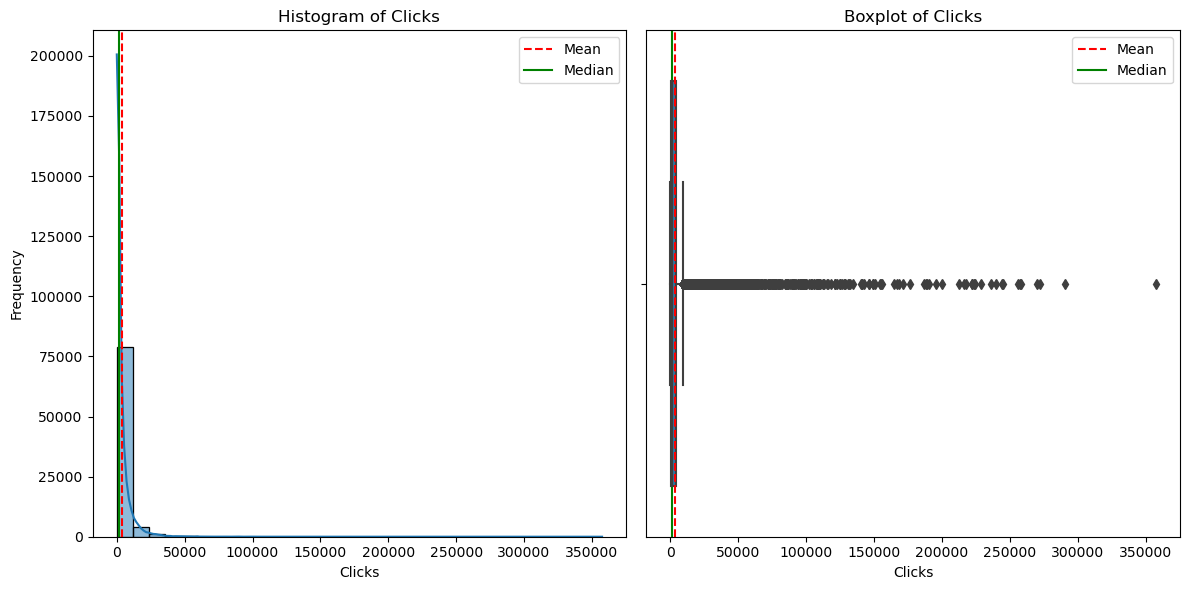

In [73]:
# Calculate mean and median
mean_clicks = total_clicks['clicks'].mean()
median_clicks = total_clicks['clicks'].median()

# Print mean and median
print(f"Mean Clicks: {mean_clicks}")
print(f"Median Clicks: {median_clicks}")

# Determine skewness
is_right_skewed = mean_clicks > median_clicks
print(f"Is the data right-skewed? {'Yes' if is_right_skewed else 'No'}")

# Visualize the distribution
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(total_clicks['clicks'], bins=30, kde=True)
plt.axvline(mean_clicks, color='r', linestyle='--', label='Mean')
plt.axvline(median_clicks, color='g', linestyle='-', label='Median')
plt.title('Histogram of Clicks')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=total_clicks['clicks'])
plt.axvline(mean_clicks, color='r', linestyle='--', label='Mean')
plt.axvline(median_clicks, color='g', linestyle='-', label='Median')
plt.title('Boxplot of Clicks')
plt.xlabel('Clicks')
plt.legend()

plt.tight_layout()
plt.show()

Mean Clicks: 3624.52
Median Clicks: 1354.0
Is the data right-skewed? Yes


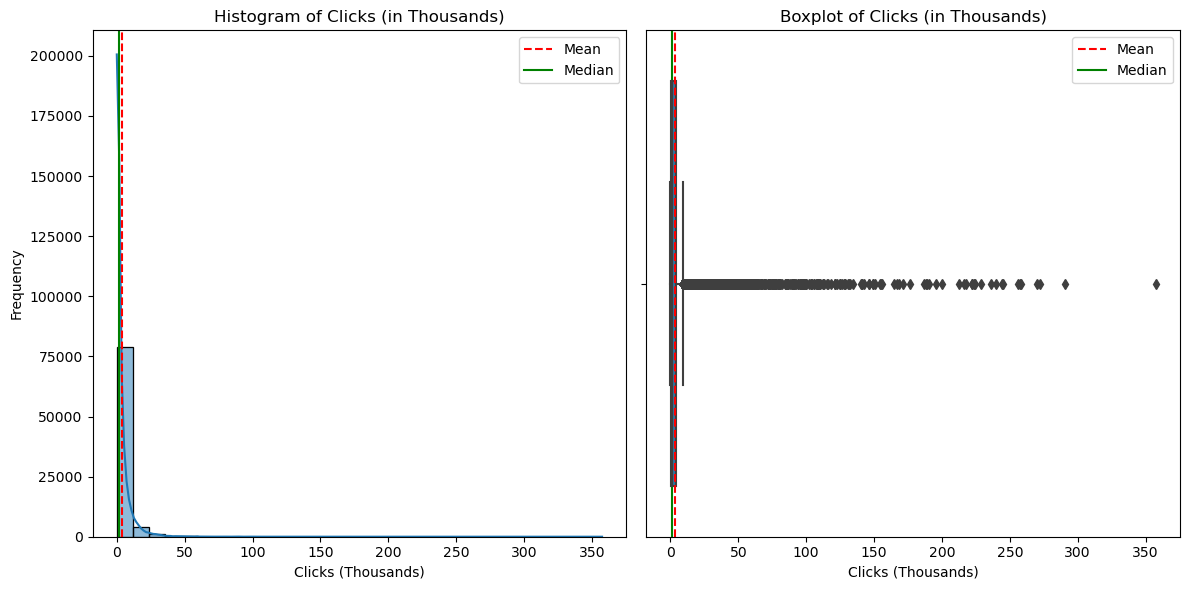

In [74]:
# Assuming you have already loaded the dataset and performed necessary aggregations

# Calculate mean and median
mean_clicks = 3624.52
median_clicks = 1354.00

# Print mean and median
print(f"Mean Clicks: {mean_clicks}")
print(f"Median Clicks: {median_clicks}")

# Determine skewness
is_right_skewed = mean_clicks > median_clicks
print(f"Is the data right-skewed? {'Yes' if is_right_skewed else 'No'}")

# Convert clicks to thousands for better visualization
total_clicks['clicks_k'] = total_clicks['clicks'] / 1000

# Visualize the distribution
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(total_clicks['clicks_k'], bins=30, kde=True)
plt.axvline(mean_clicks / 1000, color='r', linestyle='--', label='Mean')
plt.axvline(median_clicks / 1000, color='g', linestyle='-', label='Median')
plt.title('Histogram of Clicks (in Thousands)')
plt.xlabel('Clicks (Thousands)')
plt.ylabel('Frequency')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=total_clicks['clicks_k'])
plt.axvline(mean_clicks / 1000, color='r', linestyle='--', label='Mean')
plt.axvline(median_clicks / 1000, color='g', linestyle='-', label='Median')
plt.title('Boxplot of Clicks (in Thousands)')
plt.xlabel('Clicks (Thousands)')
plt.legend()

plt.tight_layout()
plt.show()

Mean Clicks: 43108.00621030346
Median Clicks: 13719.0
Skewness: 14.04836674997786
Kurtosis: 399.4377902043418
Is the data right-skewed? Yes


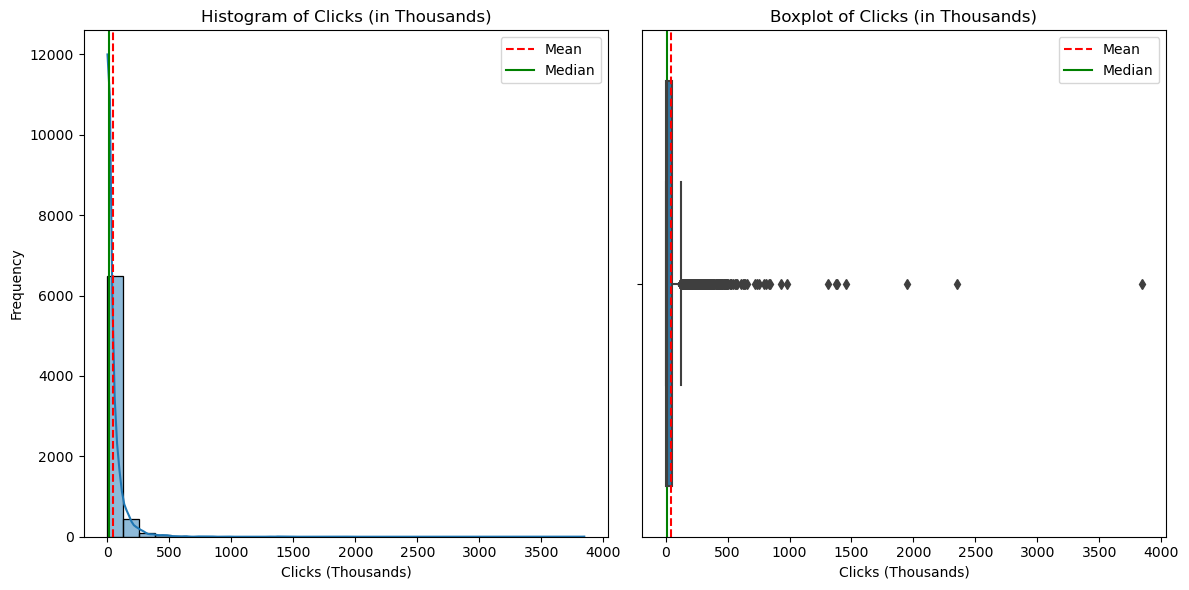

Bin range (0.00 - 128.25): Frequency = 6496
Bin range (128.25 - 256.49): Frequency = 430
Bin range (256.49 - 384.74): Frequency = 93
Bin range (384.74 - 512.99): Frequency = 38
Bin range (512.99 - 641.24): Frequency = 11
Bin range (641.24 - 769.48): Frequency = 4
Bin range (769.48 - 897.73): Frequency = 4
Bin range (897.73 - 1025.98): Frequency = 2
Bin range (1025.98 - 1154.23): Frequency = 0
Bin range (1154.23 - 1282.47): Frequency = 0
Bin range (1282.47 - 1410.72): Frequency = 3
Bin range (1410.72 - 1538.97): Frequency = 1
Bin range (1538.97 - 1667.22): Frequency = 0
Bin range (1667.22 - 1795.46): Frequency = 0
Bin range (1795.46 - 1923.71): Frequency = 0
Bin range (1923.71 - 2051.96): Frequency = 1
Bin range (2051.96 - 2180.21): Frequency = 0
Bin range (2180.21 - 2308.45): Frequency = 0
Bin range (2308.45 - 2436.70): Frequency = 1
Bin range (2436.70 - 2564.95): Frequency = 0
Bin range (2564.95 - 2693.20): Frequency = 0
Bin range (2693.20 - 2821.44): Frequency = 0
Bin range (2821.44 

In [75]:
# Aggregate total clicks for each page across all months and years
total_clicks = gsc_data.groupby('page')['clicks'].sum().reset_index()

# Calculate mean, median, skewness, and kurtosis
mean_clicks = total_clicks['clicks'].mean()
median_clicks = total_clicks['clicks'].median()
skewness_clicks = skew(total_clicks['clicks'])
kurtosis_clicks = kurtosis(total_clicks['clicks'])

# Print statistical summary
print(f"Mean Clicks: {mean_clicks}")
print(f"Median Clicks: {median_clicks}")
print(f"Skewness: {skewness_clicks}")
print(f"Kurtosis: {kurtosis_clicks}")

# Determine skewness
is_right_skewed = mean_clicks > median_clicks
print(f"Is the data right-skewed? {'Yes' if is_right_skewed else 'No'}")

# Convert clicks to thousands for better visualization
total_clicks['clicks_k'] = total_clicks['clicks'] / 1000

# Calculate frequency
bins = 30
hist, bin_edges = np.histogram(total_clicks['clicks_k'], bins=bins)

# Visualize the distribution
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(total_clicks['clicks_k'], bins=bins, kde=True)
plt.axvline(mean_clicks / 1000, color='r', linestyle='--', label='Mean')
plt.axvline(median_clicks / 1000, color='g', linestyle='-', label='Median')
plt.title('Histogram of Clicks (in Thousands)')
plt.xlabel('Clicks (Thousands)')
plt.ylabel('Frequency')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=total_clicks['clicks_k'])
plt.axvline(mean_clicks / 1000, color='r', linestyle='--', label='Mean')
plt.axvline(median_clicks / 1000, color='g', linestyle='-', label='Median')
plt.title('Boxplot of Clicks (in Thousands)')
plt.xlabel('Clicks (Thousands)')
plt.legend()

plt.tight_layout()
plt.show()

# Print histogram frequencies and bin edges for detailed understanding
for i in range(len(hist)):
    print(f"Bin range ({bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}): Frequency = {hist[i]}")

This approach first aggregates the total clicks for each page across all months and years. The mean and median values are then calculated from this aggregated data, which reflects the total clicks per page over the entire period.

## Unsupervised Machine Learning Algorithm with K-means

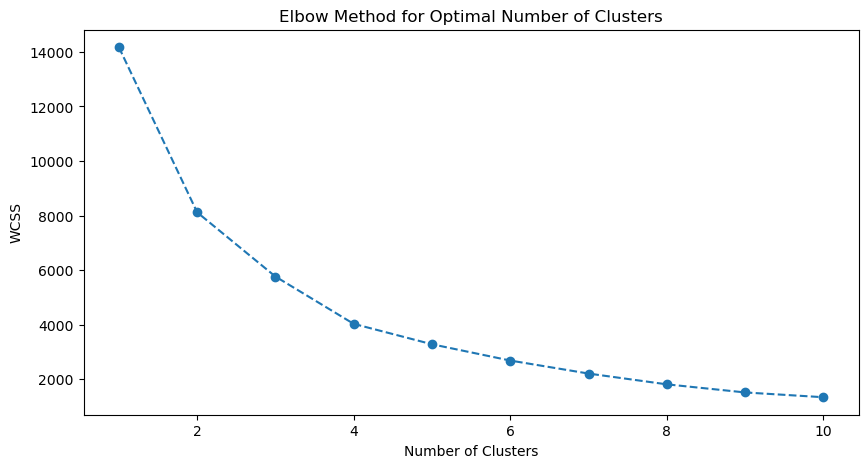

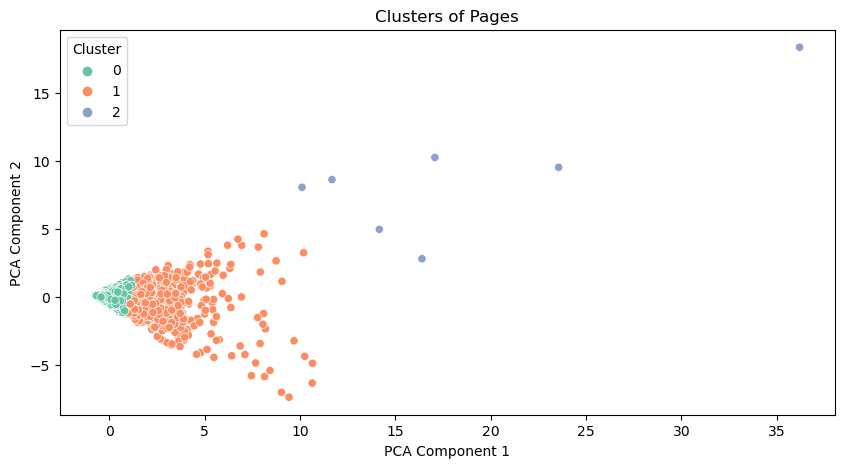

         clicks   impressions
0  2.279813e+04  8.229486e+05
1  1.839604e+05  5.712745e+06
2  1.953539e+06  1.616846e+07


In [76]:
# Aggregate total clicks and impressions for each page across all months and years
total_data = gsc_data.groupby('page').agg({
    'clicks': 'sum',
    'impressions': 'sum'
}).reset_index()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(total_data[['clicks', 'impressions']])

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means clustering with the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
total_data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=total_data['cluster'], palette='Set2')
plt.title('Clusters of Pages')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Display cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['clicks', 'impressions'])
print(cluster_centers_df)

Data Preparation:We aggregate the total clicks and impressions for each page across all months and years. This gives us a summary of the total engagement each page has received.

Data Standardization: Standardization scales the data so that each feature contributes equally to the clustering process. This is important because the scale of clicks and impressions can vary significantly, and we don't want one feature to dominate the clustering process.

Determinate Optional Number of clusters with elbow method:
The elbow method helps determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the number of clusters.
The "elbow point" is where the rate of decrease in WCSS slows down. This point suggests the optimal number of clusters.

From the plot, we choose the optimal number of clusters where the elbow point occurs. For example, if the elbow is at 3 clusters, it indicates that adding more clusters beyond this point does not significantly reduce WCSS. Here we have to decide between 3 and 4.

 Apply K-Means Clustering
 We fit the K-Means clustering algorithm to the standardized data using the optimal number of clusters identified.
Each page is assigned to a cluster, and the cluster label is stored in the total_data dataframe.

Visualize Clusters Using PCA:
PCA (Principal Component Analysis) is used to reduce the dimensionality of the data to two components for visualization purposes.
The scatter plot shows the clusters in a 2D space, with each point representing a page and its color indicating the cluster it belongs to.

Display Cluster Centers:
We inverse transform the cluster centers to their original scale to understand the average clicks and impressions for each cluster.
Insight:

The cluster centers provide insights into the typical characteristics of each cluster. For example, a cluster center with high clicks and high impressions represents pages with high engagement, while a cluster center with low clicks and low impressions represents pages with low engagement.

## Detailed Insights from Clustering Analysis
Cluster Characteristics:

Cluster 0 -High Engagement Cluster: Pages in this cluster have high clicks and high impressions. These are the most popular pages, attracting a large number of visitors and engaging them effectively.
Medium Engagement Cluster: Pages in this cluster have moderate clicks and impressions. These pages perform well but not as exceptionally as those in the high engagement cluster.
Low Engagement Cluster: Pages in this cluster have low clicks and impressions. These are the least popular pages, possibly needing improvement in content or SEO to attract more visitors.
Actionable Insights:

High Engagement Pages: Focus on maintaining the quality and visibility of these pages. They are performing well and are crucial for overall engagement.
Medium Engagement Pages: Identify opportunities to optimize these pages. Improving content quality, SEO, or user experience could help elevate them to the high engagement cluster.
Low Engagement Pages: Conduct a thorough analysis to understand why these pages are underperforming. Consider updating content, improving SEO, or making these pages more user-friendly.
Content Strategy:

Use the clustering insights to tailor your content strategy. Prioritize updates and optimizations based on the cluster each page belongs to.
For example, invest more resources in creating similar content to high engagement pages, while revisiting the strategy for low engagement pages to boost their performance.

## Which cluster is the most engaging and which is the least

In [77]:
# Aggregate total clicks and impressions for each page across all months and years
total_data = gsc_data.groupby('page').agg({
    'clicks': 'sum',
    'impressions': 'sum'
}).reset_index()

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(total_data[['clicks', 'impressions']])

# Apply K-Means clustering with the optimal number of clusters (e.g., 3)
from sklearn.cluster import KMeans
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
total_data['cluster'] = kmeans.fit_predict(scaled_data)

# Calculate the mean clicks and impressions for each cluster
cluster_means = total_data.groupby('cluster').agg({
    'clicks': 'mean',
    'impressions': 'mean'
}).reset_index()

# Display the cluster means to identify high, medium, and low engagement clusters
print(cluster_means)

# Determine cluster labels based on engagement
high_engagement_cluster = cluster_means['clicks'].idxmax()
low_engagement_cluster = cluster_means['clicks'].idxmin()
medium_engagement_cluster = [i for i in range(optimal_clusters) if i not in [high_engagement_cluster, low_engagement_cluster]][0]

print(f"High Engagement Cluster: {high_engagement_cluster}")
print(f"Medium Engagement Cluster: {medium_engagement_cluster}")
print(f"Low Engagement Cluster: {low_engagement_cluster}")

   cluster        clicks   impressions
0        0  2.285318e+04  8.250404e+05
1        1  1.845331e+05  5.726831e+06
2        2  1.953539e+06  1.616846e+07
High Engagement Cluster: 2
Medium Engagement Cluster: 1
Low Engagement Cluster: 0


In [78]:
# Sample data for demonstration
cluster_means = pd.DataFrame({
    'cluster': [0, 1, 2],
    'clicks': [2.285318e+04, 1.845331e+05, 1.953539e+06],
    'impressions': [8.250404e+05, 5.726831e+06, 1.616846e+07]
})

# Convert scientific notation to more readable format
cluster_means['clicks'] = cluster_means['clicks'].apply(lambda x: f"{x:,.0f}")
cluster_means['impressions'] = cluster_means['impressions'].apply(lambda x: f"{x:,.0f}")

print(cluster_means)

   cluster     clicks impressions
0        0     22,853     825,040
1        1    184,533   5,726,831
2        2  1,953,539  16,168,460


# Explanation:

# Cluster 0: Low Engagement

Average Clicks: 22,853
Average Impressions: 825,040

# Cluster 1: Medium Engagement

Average Clicks: 184,533
Average Impressions: 5,726,831
# Cluster 2: High Engagement

Average Clicks: 1,953,539
Average Impressions: 16,168,460

## Display Sample Pages from Each Cluster in a Formatted Table

In [79]:
import pandas as pd

# Aggregate total clicks and impressions for each page across all months and years
total_data = gsc_data.groupby('page').agg({
    'clicks': 'sum',
    'impressions': 'sum'
}).reset_index()

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(total_data[['clicks', 'impressions']])

# Apply K-Means clustering with the optimal number of clusters (e.g., 3)
from sklearn.cluster import KMeans
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
total_data['cluster'] = kmeans.fit_predict(scaled_data)

# Number of samples to display from each cluster
samples_per_cluster = 10

# Sample pages from each cluster
def sample_cluster(group, n):
    if len(group) < n:
        return group
    return group.sample(n=n, random_state=42)

cluster_samples = total_data.groupby('cluster').apply(lambda x: sample_cluster(x, samples_per_cluster)).reset_index(drop=True)

# Display the sampled pages from each cluster in a formatted table
print(cluster_samples[['page', 'clicks', 'impressions', 'cluster']].to_string(index=False))


                                           page  clicks  impressions  cluster
                          /numeros-romanos/257/       5           37        0
        /instalacao-artistica-obras-e-artistas/   54629       959167        0
                                          /eta/    7893       223195        0
                             /republica-romana/   61604      3395035        0
                                  /homeotermia/    3213       206472        0
                           /governo-provisorio/   30540       820998        0
                                /genitive-case/   34104       455428        0
                          /numeros-irracionais/   69123      3231530        0
                                /realismo-arte/   51833      1730181        0
                       /biologia/meio-ambiente/       6           88        0
                         /democracia-ateniense/   80318      3701928        1
                            /sistema-endocrino/  170166      399

## Detailed Explanation of the Clustering Results
We applied K-Means clustering to group pages based on their clicks and impressions. The clustering algorithm identified three distinct clusters. Here are the insights from each cluster:

Cluster 0: Low Engagement Cluster
Pages:

/numeros-romanos/257/
/instalacao-artistica-obras-e-artistas/
/eta/
/republica-romana/
/homeotermia/
/governo-provisorio/
/genitive-case/
/numeros-irracionais/
/realismo-arte/
/biologia/meio-ambiente/
Average Clicks: 22,853

Average Impressions: 825,040

Insights:

Low Traffic and Engagement: This cluster has significantly lower average clicks and impressions compared to the other clusters. These pages are not attracting as many visitors or engaging them effectively.
Potential Issues: The low engagement could be due to poor SEO, unappealing content, or lack of promotion. These pages might benefit from a review and optimization of their content and marketing strategies.
Example Pages:
/numeros-romanos/257/: 5 clicks, 37 impressions
/instalacao-artistica-obras-e-artistas/: 54,629 clicks, 959,167 impressions
Cluster 1: Medium Engagement Cluster
Pages:

/democracia-ateniense/
/sistema-endocrino/
/cores-em-ingles/
/o-que-sao-lipidios-funcoes-e-tipos/
/oracoes-subordinadas/
/vanguardas-europeias/
/separacao-de-silabas-kids/
/festas-juninas/
/divisao-da-historia/
/referencias-abnt/
Average Clicks: 184,533

Average Impressions: 5,726,831

Insights:

Moderate Traffic and Engagement: This cluster has moderate average clicks and impressions, performing better than the low engagement cluster but still with room for improvement.
Growth Potential: These pages have potential for growth with targeted optimization and marketing efforts. Enhancing content quality and SEO can help improve their performance.
Example Pages:
/democracia-ateniense/: 80,318 clicks, 3,701,928 impressions
/sistema-endocrino/: 170,166 clicks, 3,998,960 impressions
Cluster 2: High Engagement Cluster
Pages:

/
/adivinhas-infantis/
/adivinhas/
/conectivos/
/perguntas-e-respostas-de-conhecimentos-gerais/
/tabela-periodica/
/trava-linguas/
Average Clicks: 1,953,539

Average Impressions: 16,168,460

Insights:

High Traffic and Engagement: This cluster has the highest average clicks and impressions, indicating that these are the most popular and engaging pages.
Successful Strategies: The high performance suggests that these pages have effective content, SEO, and promotion strategies. It's important to analyze these successful strategies and apply similar tactics to pages in other clusters to boost their performance.
Example Pages:
/: 1,309,556 clicks, 4,569,760 impressions
/adivinhas-infantis/: 1,382,717 clicks, 22,487,599 impressions

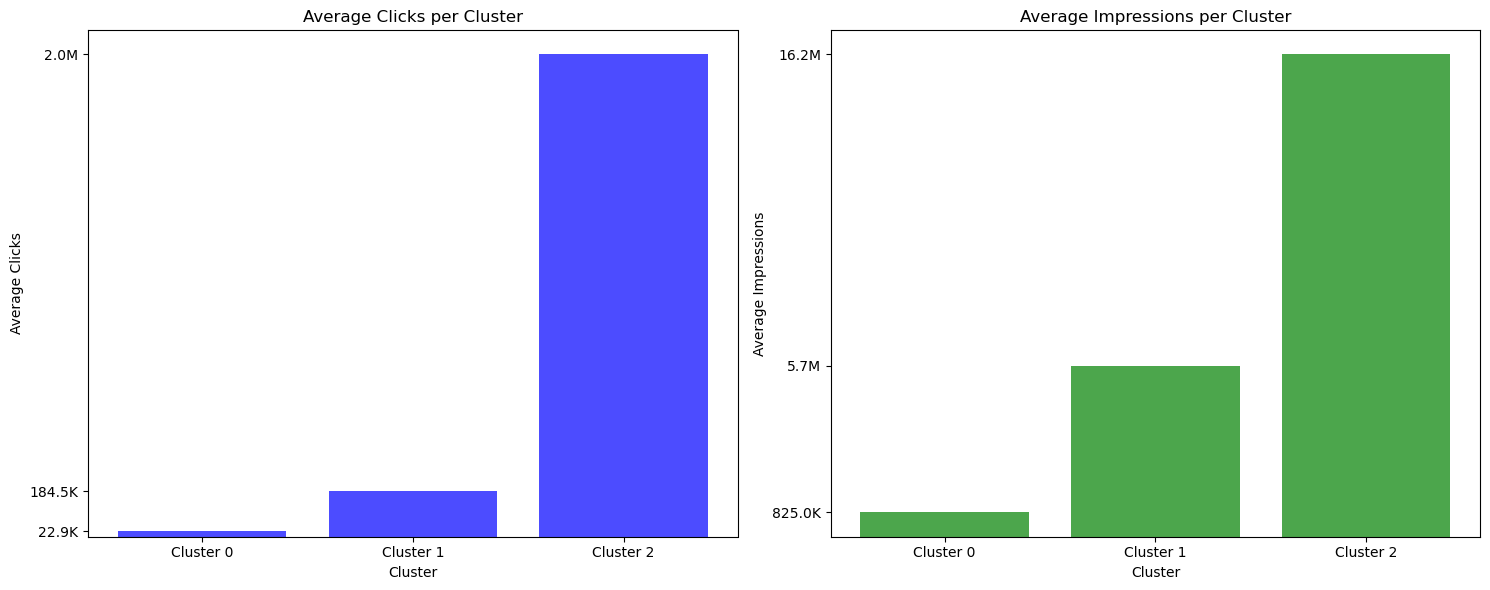

In [80]:
# Sample data for demonstration (replace this with actual data)
cluster_means = pd.DataFrame({
    'cluster': [0, 1, 2],
    'clicks': [22853, 184533, 1953539],
    'impressions': [825040, 5726831, 16168460]
})

# Function to format large numbers
def human_format(num):
    if num >= 1e6:
        return f'{num/1e6:.1f}M'
    elif num >= 1e3:
        return f'{num/1e3:.1f}K'
    else:
        return str(num)

# Plot bar chart for cluster characteristics
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart for clicks
ax[0].bar(cluster_means['cluster'], cluster_means['clicks'], color='b', alpha=0.7)
ax[0].set_title('Average Clicks per Cluster')
ax[0].set_xlabel('Cluster')
ax[0].set_ylabel('Average Clicks')
ax[0].set_xticks(cluster_means['cluster'])
ax[0].set_xticklabels([f'Cluster {int(x)}' for x in cluster_means['cluster']])
ax[0].set_yticks([22853, 184533, 1953539]) # Explicitly set y-ticks for demonstration
ax[0].set_yticklabels([human_format(x) for x in [22853, 184533, 1953539]])

# Bar chart for impressions
ax[1].bar(cluster_means['cluster'], cluster_means['impressions'], color='g', alpha=0.7)
ax[1].set_title('Average Impressions per Cluster')
ax[1].set_xlabel('Cluster')
ax[1].set_ylabel('Average Impressions')
ax[1].set_xticks(cluster_means['cluster'])
ax[1].set_xticklabels([f'Cluster {int(x)}' for x in cluster_means['cluster']])
ax[1].set_yticks([825040, 5726831, 16168460]) # Explicitly set y-ticks for demonstration
ax[1].set_yticklabels([human_format(x) for x in [825040, 5726831, 16168460]])

plt.tight_layout()
plt.show()

Cluster 0: Low Engagement Cluster
Average Clicks: 22,853
Average Impressions: 825,040
Insights:
Low Traffic and Engagement: Pages in this cluster have significantly lower average clicks and impressions compared to other clusters. These pages are not attracting as many visitors or engaging them effectively.
Potential Issues: This could be due to a variety of factors such as poor SEO, unappealing content, or lack of promotion. These pages might benefit from a review and optimization of their content and marketing strategies.
Cluster 1: Medium Engagement Cluster
Average Clicks: 184,533
Average Impressions: 5,726,831
Insights:
Moderate Traffic and Engagement: Pages in this cluster have moderate average clicks and impressions. They perform better than the low engagement cluster but still have room for improvement.
Growth Potential: With targeted optimization and marketing efforts, these pages could potentially move to the high engagement cluster. Focusing on enhancing content quality and SEO can help improve their performance.
Cluster 2: High Engagement Cluster
Average Clicks: 1,953,539
Average Impressions: 16,168,460
Insights:
High Traffic and Engagement: Pages in this cluster have the highest average clicks and impressions, indicating that they are the most popular and engaging pages.
Successful Strategies: The high performance of these pages suggests that they have effective content, SEO, and promotion strategies. It's important to analyze these successful strategies and apply similar tactics to pages in other clusters to boost their performance.